# SI 618 Project Description

## Project Title

US Chronic Disease Indicators looking at Mental Health and alcohol use and reproductive health trends

## Team Members

- Lizett, Lizett Aguilar
- Saraizas, Shirley Araiza Santaella
- JRmcmill, Jonathan McMillan

## Overview

This project will explore three different Chronic Disease Indicators from the Centers for Disease Control (CDC). We are interested in seeing trends and patterns related to mental health, alcohol use among youth, and reproductive healthcare access.



## Motivation

These three data sets are from the Centers for Disease Control (CDC) US Chronic Disease Indicators, which are a set of agreed upon surveillance indicators for state and national public health agencies. These indicators are collected from a series of other data collection programs and compiled based on the indicator. The CDI is composed of 124 different indicators. According to the CDC, “18 topic groups: alcohol; arthritis; asthma; cancer; cardiovascular disease; chronic kidney disease; chronic obstructive pulmonary disease; diabetes; immunization; nutrition, physical activity, and weight status; oral health; tobacco; overarching conditions; and new topic areas that include disability, mental health, older adults, reproductive health, and school health. For the first time, CDI includes 22 indicators of systems and environmental change. A total of 201 individual measures are included for the 124 indicators, many of which overlap multiple chronic disease topic areas or are specific to a certain sex or age group.”

Citations:

Chronic disease Indicators, Overview. Centers for Disease Control. August 3rd, 2021. National Center for Chronic Disease Prevention and Health Promotion. https://www.cdc.gov/cdi/overview.html 




We chose the CDI data sets about: 
- Mental Health 
- Alcohol use 
- Reproductive Health 

Possible Questions: 
- How do negative mental health indicators correlate to the use of alcohol among youth?
- How does access to reproductive healthcare relate to mental health indicators?
- How does mental health, reproductive health care, and alcohol use among youth vary across states and demographics?

We are interested in exploring any potential relationships between mental health outcomes for youth and issues related to high risk activities such as alcohol use, as well as perceptions and access related to reproductive health outcomes. We are interested in exploring these particular issues with recent reports finding that youth substance use is linked to mental health distress. Although the data available about youth substance abuse that we were able to find didn't correspond as well with out current data sets we hope to find any patterns of those relationships in adult self reporting datasets. Additionally, we are interested in seeing if there are any relationships with mental health indicators and access to reproductive healthcare access, as access to care continues to face variation and volatility based on state contexts. In a recent report from the CDC as reported in the Associated press, “Mental health conditions were the leading underlying cause of pregnancy-related deaths from 2017 to 2019 with nearly 23% of pregnancy-related deaths attributed to mental health conditions, including suicides and overdoses from substance use disorders.”
Using mental health as an overarching theme, we intend to parse through any potential relationships with other significant public health measures, especially with these three areas finding increasing relevance in the current American healthcare context.

- Richtel, Matt. Teen Drug and Alcohol Use Linked to Mental Health Distress. New York Times. January 29th, 2024. https://www.nytimes.com/2024/01/29/health/teens-drugs-alcohol-mental-health.html

- Fernando, Christine. Mental health emerges as a dividing line in abortion rights initiatives planned for state ballots. February 13th, 2024. Associated Press. https://apnews.com/article/abortion-mental-health-ballot-maryland-missouri-arizona-6268ec88d1638009128b55fc56e3610c 

- Zaks, Nina. et al. Association Between Mental Health and Reproductive System Disorders in Women. Journal of the American Medical Association (JAMA). April 18th, 2023, 6(4): e238685. doi: 10.1001/jamanetworkopen.2023.8685



## Data Sources

We chose these three particular subsets of data due to the similarities in their structure. We are expected to be able to merge them with minimal risk of compromise to the data integrity.

- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Mental-Health/ixrt-gnsg/about_data
- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Alcohol-use-among-y/y4cx-ipur/about_data
- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Reproductive-Health/xrn9-9eas/about_data

## Data Description and Manipulation

#### Imports for reading data, plotting, etc.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Read in the data

In [6]:
mental_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Mental_Health_20240217.csv')
alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')
reproductive_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Reproductive_Health_20240219.csv')

C:\Users\alize\AppData\Local\Temp\ipykernel_4964\655771790.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')


In [7]:
mental_health.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,...,32,MTH,MTH2_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,32,MTH,MTH1_0,MEAN,RACE,BLK,NaN,NaN,NaN,NaN


In [8]:
alcohol.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
1,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN


In [9]:
reproductive_health.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2012,2012,NV,Nevada,BRFSS,Reproductive Health,Timeliness of routine health care checkup amon...,NaN,%,Crude Prevalence,...,32,RPH,RPH1_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2016,2016,NE,Nebraska,BRFSS,Reproductive Health,Timeliness of routine health care checkup amon...,NaN,%,Crude Prevalence,...,31,RPH,RPH1_0,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN


#### Investigate sizes

In [10]:
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(og_mh.shape)
    print()

(13200, 33)

(66091, 33)

(9086, 33)



We can see all three data sets have 33 columns, and thousands of rows.

#### Investigate columns of interest

In [11]:
# let's see what years we have data for
for oh_mh in [mental_health, alcohol, reproductive_health]:
    print(sorted(og_mh.YearStart.unique()))
    print(sorted(og_mh.YearEnd.unique()))
    print()

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]



In [12]:
# let's see what sources we have data for
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(sorted(og_mh.DataSource.unique()))
    print()

['BRFSS', 'PRAMS']

['AEDS', 'APIS', 'BRFSS', 'Legal Research', 'NVSS', 'PRAMS', 'YRBSS']

['BRFSS', 'PRAMS']



In [13]:
# let's see what demographics we have data for
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(sorted(og_mh.StratificationCategory1.unique()))
    print(sorted(og_mh.Stratification1.unique()))
    print()

['Gender', 'Overall', 'Race/Ethnicity']
['Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Gender', 'Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Asian, non-Hispanic', 'Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Black, non-Hispanic', 'Hispanic', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']



#### None for the 2nd and 3rd demographic categories:

In [14]:
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(sorted(og_mh.StratificationCategory2.unique()))
    print(sorted(og_mh.Stratification2.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



In [15]:
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(sorted(og_mh.StratificationCategory3.unique()))
    print(sorted(og_mh.Stratification3.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



#### Expanding the StratificationCategory1 column

In [16]:
for og_mh in [mental_health, alcohol]:
    og_mh['Gender'] = og_mh.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Gender' else 'nan', axis=1)

In [17]:
for og_mh in [mental_health, alcohol, reproductive_health]:
    og_mh['Race/Ethnicity'] = og_mh.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Race/Ethnicity' else 'nan', axis=1)

In [18]:
for og_mh in [mental_health, alcohol, reproductive_health]:
    og_mh['Overall'] = og_mh.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Overall' else 'nan', axis=1)

In [19]:
# drop repetitive Stratification columns
drop_cols = ['StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']

for og_mh in [mental_health, alcohol, reproductive_health]:
    og_mh.drop(drop_cols, axis=1, inplace=True)

In [20]:
mental_health.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LowConfidenceLimit,HighConfidenceLimit,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,...,17.2,26.8,NaN,32,MTH,MTH2_0,CRDPREV,nan,nan,Overall
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,2.4,5.8,NaN,32,MTH,MTH1_0,MEAN,nan,"Black, non-Hispanic",nan
2,2018,2018,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,4.4,5.6,NaN,32,MTH,MTH1_0,MEAN,Female,nan,nan


Expanded the stratification category for race, gender, and overall column, and then where ever there is a value in that row, that row will have a summary statistic for that demographic category. This was done for all three datasets.

#### Investigate Location data columns

In [21]:
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(og_mh.LocationAbbr.nunique())
    print(og_mh.LocationDesc.nunique())
    print(og_mh.LocationID.nunique())
    print()

55
55
55

55
55
55

55
55
55



In [22]:
# print if the LocationAbbr, LocationDesc, and LocationID have the same values for each dataset
for location in ['LocationAbbr', 'LocationDesc', 'LocationID']:
    print(set(mental_health[location].unique()) == set(alcohol[location].unique()))
    print(set(mental_health[location].unique()) == set(reproductive_health[location].unique()))
    print(set(alcohol[location].unique()) == set(reproductive_health[location].unique()))
    print()

True
True
True

True
True
True

True
True
True



In [23]:
# just keep one of them, LocationDesc
for og_mh in [mental_health, alcohol, reproductive_health]:
    og_mh.drop(['LocationAbbr', 'LocationID'], axis=1, inplace=True)

In [24]:
# find columns in all DFs that only have NaN values
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(og_mh.columns[og_mh.isna().all()].tolist())

['Response', 'ResponseID']
['Response', 'ResponseID']
['Response', 'ResponseID']


In [25]:
# remove Reponse and ResponseID from all DFs
for og_mh in [mental_health, alcohol, reproductive_health]:
    og_mh.drop(['Response', 'ResponseID'], axis=1, inplace=True)

In [26]:
mental_health.head(3)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,21.6,NaN,NaN,17.2,26.8,MTH,MTH2_0,CRDPREV,nan,nan,Overall
1,2020,2020,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1,NaN,NaN,2.4,5.8,MTH,MTH1_0,MEAN,nan,"Black, non-Hispanic",nan
2,2018,2018,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.6,MTH,MTH1_0,MEAN,Female,nan,nan


In [27]:
# print all unique Topic and TopicID values for each DF
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(sorted(og_mh.Topic.unique()))
    print(sorted(og_mh.TopicID.unique()))
    print()

['Mental Health']
['MTH']

['Alcohol']
['ALC']

['Reproductive Health']
['RPH']



In [28]:
# drop TopicID from all DFs
for og_mh in [mental_health, alcohol, reproductive_health]:
    og_mh.drop(['TopicID'], axis=1, inplace=True)

In [29]:
# get unique DataValueType and DataValueTypeID values for each DF
for og_mh in [mental_health, alcohol, reproductive_health]:
    print(sorted(og_mh.DataValueType.unique()))
    print(sorted(og_mh.DataValueTypeID.unique()))
    print()

# and get the common DataValueType values across mental_health and alcohol, then mental_health and reproductive_health
print(set(mental_health.DataValueType.unique()) & set(alcohol.DataValueType.unique()))
print(set(mental_health.DataValueType.unique()) & set(reproductive_health.DataValueType.unique()))

['Age-adjusted Mean', 'Crude Prevalence', 'Mean']
['AGEADJMEAN', 'CRDPREV', 'MEAN']

['Age-adjusted Mean', 'Age-adjusted Prevalence', 'Age-adjusted Rate', 'Commercial host (dram shop) liability status for alcohol service', 'Crude Prevalence', 'Crude Rate', 'Local control of the regulation of alcohol outlet density', 'Mean', 'Number', 'Per capita alcohol consumption', 'US Dollars']
['AGEADJMEAN', 'AGEADJPREV', 'AGEADJRATE', 'COMMHSTLIAB', 'CRDPREV', 'CRDRATE', 'LCLCNTRLALC', 'MEAN', 'NMBR', 'PERCAPALC', 'USD']

['Crude Prevalence']
['CRDPREV']

{'Mean', 'Age-adjusted Mean', 'Crude Prevalence'}
{'Crude Prevalence'}


#### NOTE: *Crude Prevalence* is the answer to: How many *something* occurred per year for every 100,000 persons in the selected population?
[https://www.cdc.gov/injury/wisqars/mapping_help/crude_rate.html]

In [30]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].Question.unique()

array(['Recent mentally unhealthy days among adults aged >= 18 years'],
      dtype=object)

## Data Visualization

#### Let's look at some graphs of the data for MI

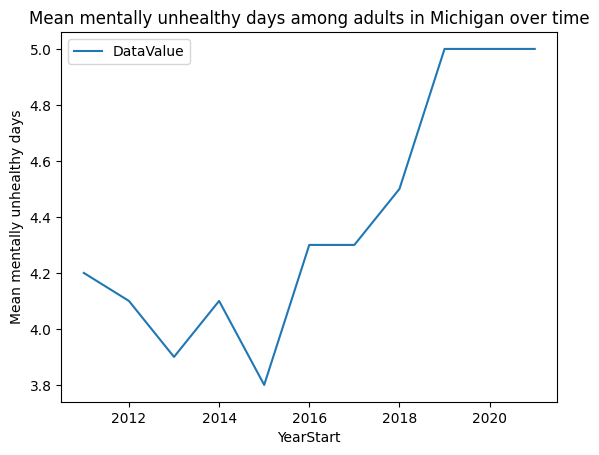

In [31]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.ylabel('Mean mentally unhealthy days')
_ = plt.title('Mean mentally unhealthy days among adults in Michigan over time')

In [32]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')].head(3)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
40651,2018,2018,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.8,4.8,NaN,NaN,4.4,5.2,ALC3_0,MEAN,nan,nan,Overall
40861,2021,2021,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.7,ALC3_0,MEAN,nan,nan,Overall
40936,2017,2017,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.5,4.5,NaN,NaN,4.2,4.9,ALC3_0,MEAN,nan,nan,Overall


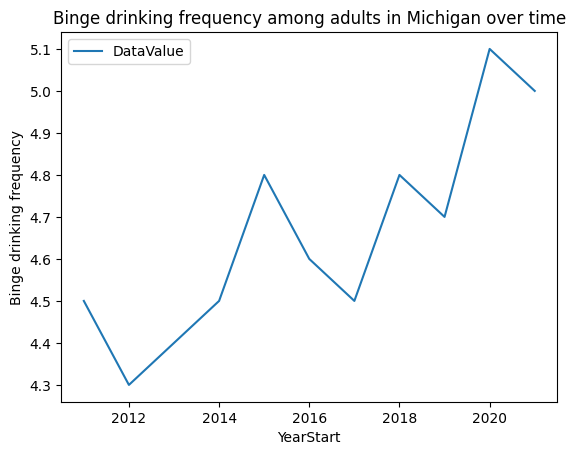

In [33]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.ylabel('Binge drinking frequency')
_ = plt.title('Binge drinking frequency among adults in Michigan over time')

#### And combined for correlation

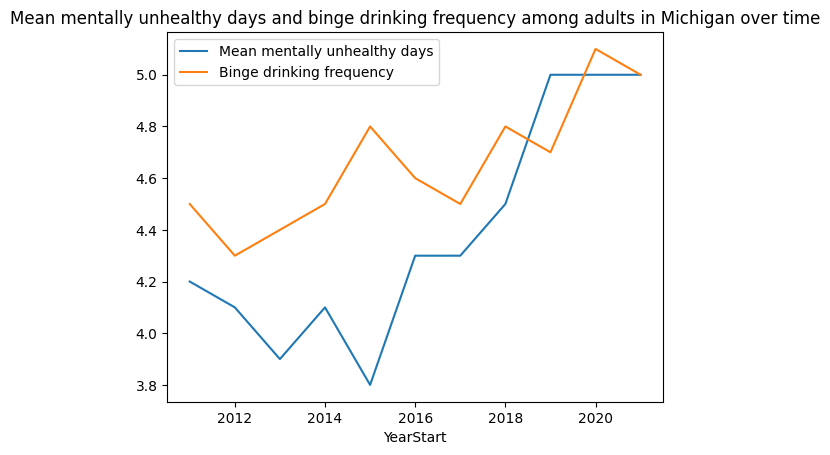

In [34]:
mh_mi = mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')]
al_mi = alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]
mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart').plot(x='YearStart', y=['DataValue_mh', 'DataValue_al'], kind='line')
plt.legend(['Mean mentally unhealthy days', 'Binge drinking frequency'])
_ = plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')

We see an interesting trend among the two variables over time, something to consider investigating in the future.

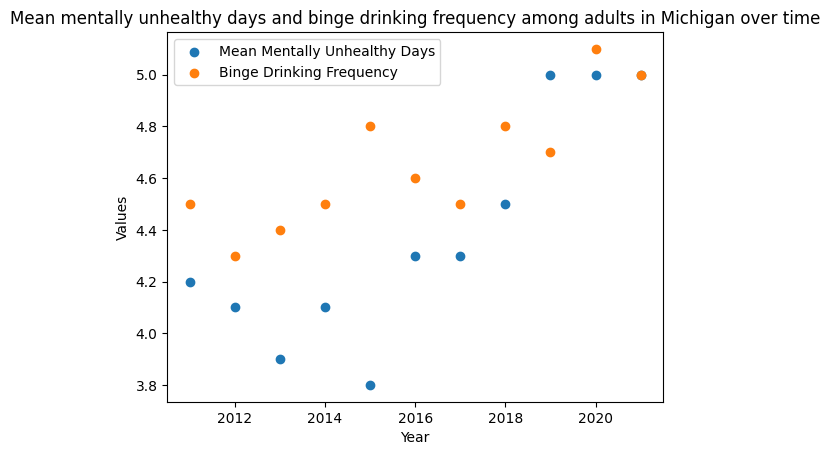

In [35]:
# Merge the DataFrames
mh_al_mi = mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart')

# Create a scatter plot of the line plot
plt.scatter(mh_al_mi['YearStart'], mh_al_mi['DataValue_mh'], label='Mean Mentally Unhealthy Days')
plt.scatter(mh_al_mi['YearStart'], mh_al_mi['DataValue_al'], label='Binge Drinking Frequency')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')
plt.legend()
plt.show()

In [36]:
# find the correlation coefficient between the two variables
corr_mh_al_mi = mh_al_mi['DataValue_mh'].corr(mh_al_mi['DataValue_al'])
print("Correlation Coefficient of Mean Mentally Unhealthy Data and Binge Drinking in Michigan:", corr_mh_al_mi)


Correlation Coefficient of Mean Mentally Unhealthy Data and Binge Drinking in Michigan: 0.6904164189808101


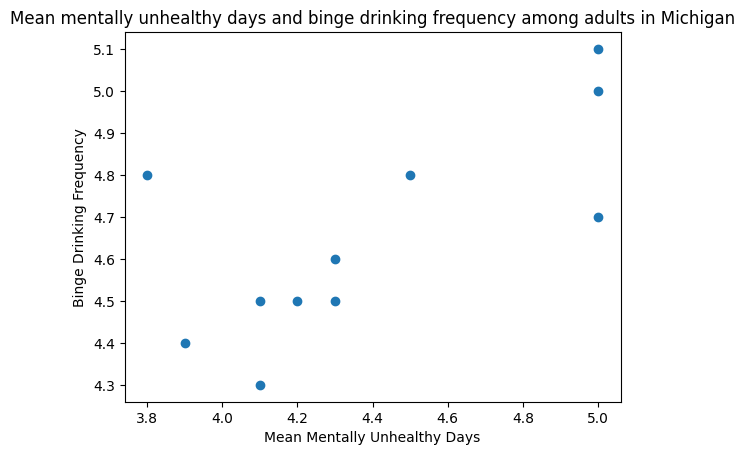

In [37]:
plt.scatter(mh_al_mi['DataValue_mh'], mh_al_mi['DataValue_al'])
plt.xlabel('Mean Mentally Unhealthy Days')
plt.ylabel('Binge Drinking Frequency')
plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan')
_ = plt.show()

Positive correlation of 0.7 between the incidence of binge drinking and average mentally unhealthy days in the state of Michigan, indicating that binge drinking increases as people self report mentally unhealthy days.

In [38]:
# get unique Question values for reproductive_health
reproductive_health.Question.unique()

array(['Timeliness of routine health care checkup among women aged 18-44 years',
       'Postpartum checkup', 'Folic acid supplementation'], dtype=object)

In [39]:
# and get the reported aggregate values for Michigan
reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall')].Question.unique()

array(['Postpartum checkup', 'Folic acid supplementation',
       'Timeliness of routine health care checkup among women aged 18-44 years'],
      dtype=object)

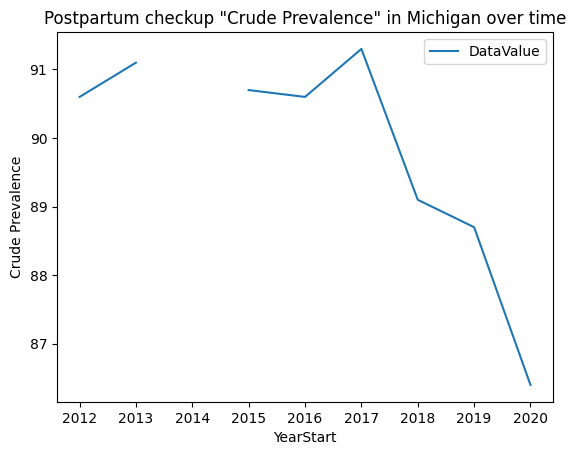

In [40]:
reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall') & (reproductive_health.Question == 'Postpartum checkup')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.title('Postpartum checkup "Crude Prevalence" in Michigan over time')
plt.ylabel('Crude Prevalence')
_ = plt.show()

In [41]:
# check reproductive_health for missing YearStart values of 2013 to 2015
reproductive_health[(reproductive_health.YearStart <= 2013) | (reproductive_health.YearStart >= 2015)].YearStart.unique()

array([2012, 2016, 2013, 2015, 2017, 2019, 2020, 2018, 2021, 2011],
      dtype=int64)

We can see the reproductive health data set is missing a *YearStart* of 2014.

In [42]:
# let's find the correlation coefficient between the two variables
rh_mi = reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall') & (reproductive_health.Question == 'Postpartum checkup')]
mh_rh_mi = mh_mi.merge(rh_mi, on='YearStart', suffixes=('_mh', '_rh'), how='inner').sort_values(by='YearStart')
mh_rh_mi['DataValue_mh'].corr(mh_rh_mi['DataValue_rh'])

-0.8402165453495583

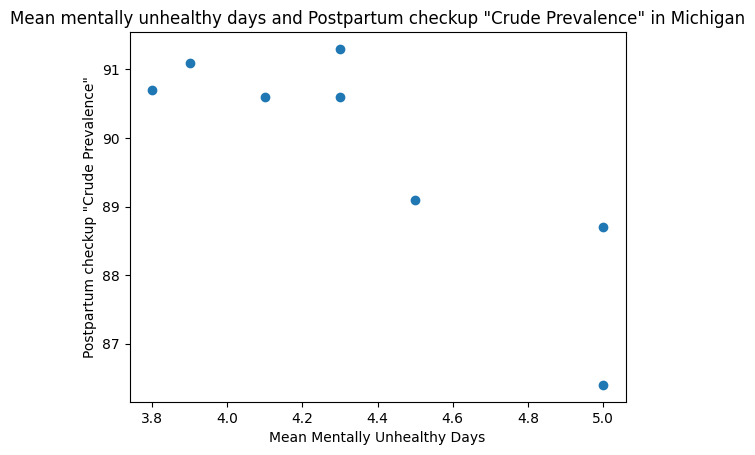

In [43]:
# now let's plot the scatter plot
plt.scatter(mh_rh_mi['DataValue_mh'], mh_rh_mi['DataValue_rh'])
plt.xlabel('Mean Mentally Unhealthy Days')
plt.ylabel('Postpartum checkup "Crude Prevalence"')
plt.title('Mean mentally unhealthy days and Postpartum checkup "Crude Prevalence" in Michigan')
_ = plt.show()

Strong negative correlation of -0.84, indicating that as the number of postpartum checkups decreased, that was associated with a higher average of overall mentally unhealthy days.

#### Distributions of means across data sets

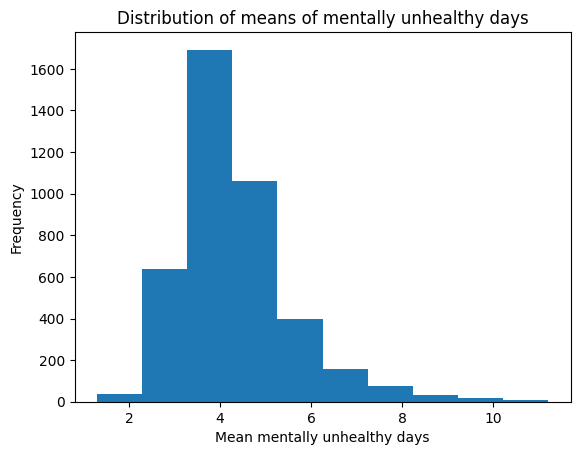

In [44]:
# histogram of means of mentally unhealthy days
mental_health[mental_health.DataValueType == 'Mean'].DataValue.plot(kind='hist')
plt.xlabel('Mean mentally unhealthy days')
_ = plt.title('Distribution of means of mentally unhealthy days')

We can see the distribution of means is "normal-ish", and right skewed, indicating the number of reported mentally-unhealthy days tends toward the lower values.

C:\Users\alize\AppData\Local\Temp\ipykernel_4964\3857720546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_mh['DataValue'] = pd.to_numeric(og_mh['DataValue'], errors='coerce')


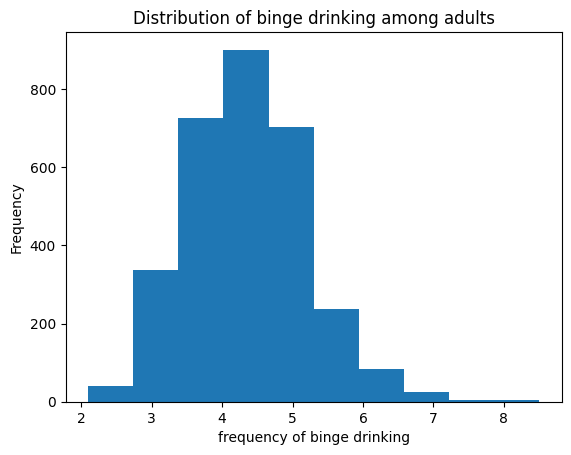

In [45]:
# histogram of means of binge drinking frequency, ignoring NaN values
og_mh= alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]
og_mh['DataValue'] = pd.to_numeric(og_mh['DataValue'], errors='coerce')
og_mh.DataValue.dropna().plot(kind='hist')
plt.title('Distribution of binge drinking among adults')
plt.xlabel('frequency of binge drinking')
_ = plt.show()

This distribution is also fairly normal. It's also right skewed, but less so than the the mental health means.

C:\Users\alize\AppData\Local\Temp\ipykernel_4964\28580297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_mh['DataValue'] = pd.to_numeric(og_mh['DataValue'], errors='coerce')


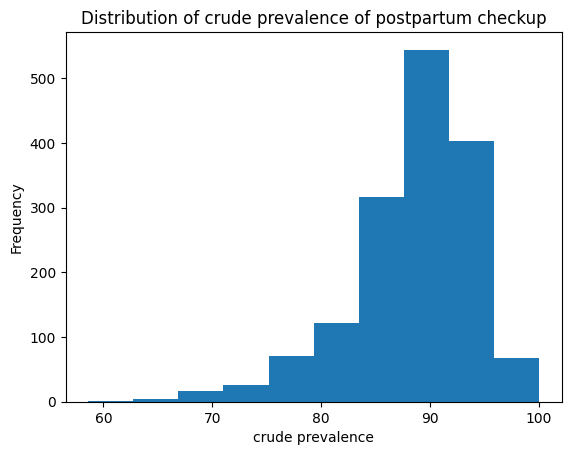

In [46]:
# histogram of crude prevalence of postpartum checkup
og_mh = reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.Question == 'Postpartum checkup')]
og_mh['DataValue'] = pd.to_numeric(og_mh['DataValue'], errors='coerce')
og_mh.DataValue.dropna().plot(kind='hist')
plt.title('Distribution of crude prevalence of postpartum checkup')
plt.xlabel('crude prevalence')
_ = plt.show()

Finally, we have another normal distribution for "crude prevalence" of postpartum checkup. While the prior distributions were right skewed, this one appears left skewed, indicating a more optimistic statistic that it's more common for higher percentages of populations to have postpartum checkups.

Overall, we have a lot to work with across these three data sets. We have further ideas for investigating trends across various demographics like race and gender, and feel confident we can perform statistical tests with our aggregate data since the confidence interval values are included. We plan to merge the alcohol and reproductive health data sets separately with the mental health data set when conducting further analysis, as needed, since the main focus is mental health impacts.

# Project Analysis Part 2

### Descriptive Statistics

Provide a comprehensive summary of your combined dataset using descriptive statistics. This should include means, medians, modes, ranges, variance, and standard deviations for the relevant features of your data. The descriptive statistics should inform your guiding questions that you developed in Part I of the project, rather than merely providing an overview of your data. Interpret these results to draw preliminary conclusions about the data.


- Part of our analysis includes comparing a merged data set of mental health, alcohol use, and reproductive health for the state of Michigan. Step two of our project includes comparing these sames outcomes to a similarly joined data set for the greater United States. We are interested in looking at demographic information such as race and ethnicity, gender, and location.


In [47]:
mental_health['DataValue'] = mental_health['DataValue'].astype(str)
alcohol['DataValue'] = alcohol['DataValue'].astype(str)

#### Merging of Mental Health and Alcohol Chronic Disease Indicators for Greater United States, short hand is MA 

In [48]:
national_merged_MA = pd.merge(mental_health, alcohol, on=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'DataValueType', 'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'QuestionID', 'DataValueTypeID', 'Gender', 'Race/Ethnicity'], how='outer')

In [49]:
national_merged_MA.head()

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit_x,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall_x,DataValueUnit_y,DataValueFootnoteSymbol_y,DatavalueFootnote_y,Overall_y
0,2009,2011,Alabama,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
1,2009,2011,Alaska,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
2,2009,2011,Arizona,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
3,2009,2011,Arkansas,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,18.0,18.0,...,21.6,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
4,2009,2011,California,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN


In [50]:
national_merged_MA.columns

Index(['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic',
       'Question', 'DataValueUnit_x', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol_x', 'DatavalueFootnote_x',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'QuestionID',
       'DataValueTypeID', 'Gender', 'Race/Ethnicity', 'Overall_x',
       'DataValueUnit_y', 'DataValueFootnoteSymbol_y', 'DatavalueFootnote_y',
       'Overall_y'],
      dtype='object')

In [51]:
print(national_merged_MA.isnull().any())

YearStart                    False
YearEnd                      False
LocationDesc                 False
DataSource                   False
Topic                        False
Question                     False
DataValueUnit_x               True
DataValueType                False
DataValue                    False
DataValueAlt                  True
DataValueFootnoteSymbol_x     True
DatavalueFootnote_x           True
LowConfidenceLimit            True
HighConfidenceLimit           True
QuestionID                   False
DataValueTypeID              False
Gender                       False
Race/Ethnicity               False
Overall_x                     True
DataValueUnit_y               True
DataValueFootnoteSymbol_y     True
DatavalueFootnote_y           True
Overall_y                     True
dtype: bool


In [52]:
national_merged_MA['Race/Ethnicity'].value_counts()

Race/Ethnicity
nan                                 28383
White, non-Hispanic                 10054
Black, non-Hispanic                 10054
Hispanic                            10054
Multiracial, non-Hispanic            8041
Other, non-Hispanic                  8041
American Indian or Alaska Native     2332
Asian or Pacific Islander            2002
Asian, non-Hispanic                   330
Name: count, dtype: int64

### mean, median, mode, standard deviation, variance for data values in MA dataset

In [53]:
national_merged_MA['DataValueAlt'].describe().round(3)

count    53685.000
mean        42.844
std        599.052
min          0.000
25%          4.800
50%          7.700
75%         16.100
max      51642.000
Name: DataValueAlt, dtype: float64

In [54]:
national_merged_MA['DataValueAlt'].var().round(3)

358863.657

### Below is specific data analysis based on our variables of interest, MA set

In [55]:
national_merged_MA['Race/Ethnicity'].describe()

count     79291
unique        9
top         nan
freq      28383
Name: Race/Ethnicity, dtype: object

In [56]:
national_merged_MA.groupby(['Race/Ethnicity'])['DataValue'].describe()

,count,unique,top,freq
Race/Ethnicity,,,,
American Indian or Alaska Native,2332,390,nan,1788
Asian or Pacific Islander,2002,215,nan,1587
"Asian, non-Hispanic",330,79,nan,226
"Black, non-Hispanic",10054,575,nan,4896
Hispanic,10054,607,nan,4365
"Multiracial, non-Hispanic",8041,423,nan,5786
"Other, non-Hispanic",8041,274,nan,4919
"White, non-Hispanic",10054,988,nan,577
nan,28383,1556,nan,1159


- total counts for Race/Ethnicity in MA dataset is 50,908
- eight unique race/ethnicity categories
- most common racial/ethnic demographic is white, non-Hispanic at 10,054

In [57]:
national_merged_MA.groupby(['LocationDesc'])['DataValue'].describe()

,count,unique,top,freq
LocationDesc,,,,
Alabama,1475,276,nan,528
Alaska,1496,331,nan,495
Arizona,1440,320,nan,355
Arkansas,1482,299,nan,546
California,1433,337,nan,156
Colorado,1489,344,nan,394
Connecticut,1482,323,nan,380
Delaware,1496,301,nan,554
District of Columbia,1454,314,nan,504


In [58]:
national_merged_MA.groupby('Race/Ethnicity')['LocationDesc'].describe()

,count,unique,top,freq
Race/Ethnicity,,,,
American Indian or Alaska Native,2332,55,Washington,48
Asian or Pacific Islander,2002,53,Vermont,42
"Asian, non-Hispanic",330,55,Alabama,6
"Black, non-Hispanic",10054,55,Washington,191
Hispanic,10054,55,Washington,191
"Multiracial, non-Hispanic",8041,55,Illinois,152
"Other, non-Hispanic",8041,55,Illinois,152
"White, non-Hispanic",10054,55,Washington,191
nan,28383,55,Alabama,523


#### Descriptive Stats about race/ethnicity and question in alcohol data set

In [59]:
question_counts = national_merged_MA.groupby(['Race/Ethnicity', 'Question']).size().reset_index(name='Count')

question_counts_sorted = question_counts.sort_values(['Race/Ethnicity', 'Count'], ascending=[True, False])

top_questions_by_race = question_counts_sorted.groupby('Race/Ethnicity').head(1)

top_questions_by_race

,Race/Ethnicity,Question,Count
3,American Indian or Alaska Native,Chronic liver disease mortality,1683
5,Asian or Pacific Islander,Chronic liver disease mortality,1683
6,"Asian, non-Hispanic",Alcohol use among youth,220
16,"Black, non-Hispanic",Chronic liver disease mortality,1683
28,Hispanic,Chronic liver disease mortality,1683
34,"Multiracial, non-Hispanic",Binge drinking frequency among adults aged >= ...,1188
43,"Other, non-Hispanic",Binge drinking frequency among adults aged >= ...,1188
58,"White, non-Hispanic",Chronic liver disease mortality,1683
73,nan,Chronic liver disease mortality,5082


The most frequently reported health issue among most racial and ethnic groups, including American Indian or Alaska Native, Asian or Pacific Islander, Black, non-Hispanic, Hispanic, and White, non-Hispanic, is chronic liver disease mortality, each with 1683 counts. In contrast, the most prevalent issues reported for Asian, non-Hispanic, and Multiracial, non-Hispanic groups are alcohol use among youth (220 counts) and binge drinking frequency among adults aged >= 18 years (1188 counts), respectively.

In [60]:
common_columns = set(mental_health.columns) & set(reproductive_health.columns)
print(common_columns)

{'DataSource', 'Question', 'Topic', 'LowConfidenceLimit', 'YearEnd', 'DataValue', 'HighConfidenceLimit', 'DataValueTypeID', 'DataValueFootnoteSymbol', 'LocationDesc', 'YearStart', 'DataValueAlt', 'DataValueUnit', 'DataValueType', 'QuestionID', 'DatavalueFootnote', 'Overall', 'Race/Ethnicity'}


In [61]:
# national_merged_MA for 'Per capita alcohol consumption' by state

national_alcohol_percapita_df = national_merged_MA[(national_merged_MA.DataValueType == 'Per capita alcohol consumption')]
national_alcohol_percapita_df

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit_x,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall_x,DataValueUnit_y,DataValueFootnoteSymbol_y,DatavalueFootnote_y,Overall_y
55,2010,2010,Alabama,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.0,2.00,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
80,2010,2010,Alaska,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,3.0,3.00,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
105,2010,2010,Arizona,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.4,2.40,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
130,2010,2010,Arkansas,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,1.8,1.80,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
155,2010,2010,California,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.2,2.20,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73075,2020,2020,Virginia,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.27,2.27,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
73210,2020,2020,Washington,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.26,2.26,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
73345,2020,2020,West Virginia,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,1.82,1.82,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall
73480,2020,2020,Wisconsin,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,3.11,3.11,...,NaN,ALC7_0,PERCAPALC,nan,nan,NaN,gallons,NaN,NaN,Overall


#### Below is the merging of all data sets denoted as MR (Mental Health and Reproductive Health)

In [62]:
print(mental_health.dtypes)

YearStart                    int64
YearEnd                      int64
LocationDesc                object
DataSource                  object
Topic                       object
Question                    object
DataValueUnit               object
DataValueType               object
DataValue                   object
DataValueAlt               float64
DataValueFootnoteSymbol     object
DatavalueFootnote           object
LowConfidenceLimit         float64
HighConfidenceLimit        float64
QuestionID                  object
DataValueTypeID             object
Gender                      object
Race/Ethnicity              object
Overall                     object
dtype: object


In [63]:
print(reproductive_health.dtypes)

YearStart                    int64
YearEnd                      int64
LocationDesc                object
DataSource                  object
Topic                       object
Question                    object
DataValueUnit               object
DataValueType               object
DataValue                  float64
DataValueAlt               float64
DataValueFootnoteSymbol     object
DatavalueFootnote           object
LowConfidenceLimit         float64
HighConfidenceLimit        float64
QuestionID                  object
DataValueTypeID             object
Race/Ethnicity              object
Overall                     object
dtype: object


In [64]:
mental_health['DataValue'] = mental_health['DataValue'].astype('float64')
reproductive_health['DataValue'] = reproductive_health['DataValue'].astype('float64')

In [65]:
national_merged_MR= pd.merge(mental_health, reproductive_health, on=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'DataValueType', 'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'QuestionID', 'DataValueTypeID','Race/Ethnicity'], how='outer')

Descriptive Statistics, Mental health and Reproductive Health, MR for shorthand

In [66]:
national_merged_MR.head()

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit_x,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall_x,DataValueUnit_y,DataValueFootnoteSymbol_y,DatavalueFootnote_y,Overall_y
0,2009,2011,Alabama,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,NaN,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
1,2009,2011,Alaska,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,NaN,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
2,2009,2011,Arizona,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,NaN,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
3,2009,2011,Arkansas,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,18.0,18.0,...,21.6,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN
4,2009,2011,California,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,NaN,NaN,...,NaN,MTH3_0,CRDPREV,nan,nan,Overall,NaN,NaN,NaN,NaN


In [67]:
national_merged_MR['DataValue'] = pd.to_numeric(national_merged_MR['DataValue'], errors='coerce')

Mean, median, count, standard deviation, variance for MR data set

In [68]:
national_merged_MR['DataValue'].describe().round(3)

count    16226.000
mean        26.044
std         30.465
min          1.200
25%          4.000
50%          6.600
75%         43.800
max        100.000
Name: DataValue, dtype: float64

In [69]:
national_merged_MR['DataValue'].var().round(3)

928.135

In [70]:
national_merged_MR = national_merged_MR.rename(columns={'Race/Ethnicity': 'RaceEthnicity'})

In [71]:
national_merged_MR.groupby(['RaceEthnicity'])['DataValue'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
RaceEthnicity,,,,,,,,
American Indian or Alaska Native,169.0,49.447,28.664,12.2,20.8,58.60,78.100,91.9
Asian or Pacific Islander,380.0,65.433,26.585,16.4,40.4,68.55,91.800,99.5
"Black, non-Hispanic",2008.0,31.351,33.445,2.3,4.5,15.15,73.600,99.7
Hispanic,2342.0,28.641,30.764,1.6,4.1,12.20,58.275,98.2
"Multiracial, non-Hispanic",1458.0,21.444,26.838,2.8,5.7,7.20,26.675,100.0
"Other, non-Hispanic",1597.0,19.028,26.266,1.2,3.5,4.80,16.100,99.1
"White, non-Hispanic",2837.0,32.452,31.706,1.3,4.3,17.10,62.100,98.4
nan,5435.0,19.434,27.040,1.8,3.7,4.60,21.000,96.3


In [72]:
national_merged_MR['DataValue'].var().round(3)

928.135

The summary statistics show that the datasets have similar mean values for various numeric variables across different years, with moderate standard deviations indicating some variability. Additionally, the ranges of the data suggest a spread from the minimum to maximum values, while quartiles provide insight into the central tendency and variability of the data distribution.

- Standard Deviation for Data Values Total is at 27.854
- - for race and ethnicity, broken down the data shows highest disbursement among Black, Hispanic, Multi-Racial, and White non-Hispanic population
- Variance, or spread of data points in the reproductive health and mental health national set is 775.822, indicating more dispersion from the mean.

# Inferential Statistics

- Conduct appropriate hypothesis tests to investigate if there are significant differences or correlations within your data. This might involve regression analysis, ANOVA, and/or chi-squared tests.

- Clearly state your null and alternative hypotheses, choose an appropriate significance level, and
discuss your findings. Make sure to justify the choice of your tests.

In [73]:
national_merged_MA.columns

Index(['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic',
       'Question', 'DataValueUnit_x', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol_x', 'DatavalueFootnote_x',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'QuestionID',
       'DataValueTypeID', 'Gender', 'Race/Ethnicity', 'Overall_x',
       'DataValueUnit_y', 'DataValueFootnoteSymbol_y', 'DatavalueFootnote_y',
       'Overall_y'],
      dtype='object')

In [74]:
national_merged_MA = national_merged_MA.rename(columns={'Race/Ethnicity': 'RaceEthnicity'})

In [75]:
# Convert 'DataValue' to numeric
national_merged_MA['DataValue'] = pd.to_numeric(national_merged_MA['DataValue'], errors='coerce')

# Then fit the model
MA_model = smf.ols('DataValue ~ RaceEthnicity + LocationDesc', data=national_merged_MA).fit()
print(MA_model.summary())

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.64
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.11e-133
Time:                        19:55:47   Log-Likelihood:            -1.6688e+05
No. Observations:               26764   AIC:                         3.339e+05
Df Residuals:                   26702   BIC:                         3.344e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [76]:
# ANOVA
anova_results = sm.stats.anova_lm(MA_model, typ=2)
anova_results


,sum_sq,df,F,PR(>F)
RaceEthnicity,6.739298e+06,7.0,62.960123,2.531849e-90
LocationDesc,6.964030e+06,54.0,8.433655,3.164579e-64
Residual,4.083145e+08,26702.0,NaN,NaN


In [77]:
from scipy import stats
# Chi-squared test
MA_contingency_table = pd.crosstab(national_merged_MA['RaceEthnicity'], national_merged_MA['LocationDesc'])
chi2, p, dof, expected = stats.chi2_contingency(MA_contingency_table)
print(f"Chi2 value: {chi2}, p-value: {p}")

Chi2 value: 738.4271676824821, p-value: 2.1193588202335007e-18


In [78]:
# Drop rows with null values in the specified columns
national_merged_MR = national_merged_MR.dropna(subset=['DataValue', 'RaceEthnicity', 'LocationDesc'])

#regression analysis
MR_model = smf.ols('DataValue ~ RaceEthnicity + LocationDesc', data=national_merged_MR).fit()
print(MR_model.summary())

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     20.72
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.01e-207
Time:                        19:55:48   Log-Likelihood:                -51960.
No. Observations:               10791   AIC:                         1.040e+05
Df Residuals:                   10730   BIC:                         1.045e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [79]:
# ANOVA
anova_results = sm.stats.anova_lm(MR_model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
RaceEthnicity,7.300900e+05,6.0,135.797107,2.116891e-166
LocationDesc,2.532182e+05,54.0,5.233190,3.548826e-32
Residual,9.614670e+06,10730.0,NaN,NaN


In [80]:
# Chi-squared test
MR_contingency_table = pd.crosstab(national_merged_MR['RaceEthnicity'], national_merged_MR['LocationDesc'])
chi2, p, dof, expected = stats.chi2_contingency(MR_contingency_table)
print(f"Chi2 value: {chi2}, p-value: {p}")

Chi2 value: 2195.7735203615275, p-value: 2.947506075322552e-253


# Graphical Analysis

Create various types of plots to visualize relationships within your data. Use histograms, bar charts, scatter plots, box plots, and any other suitable graphical representations you've learned.

Be sure to use appropriate titles, labels, and legends to make your plots readable and informative. Interpret the graphical representations to uncover patterns, trends, and outliers.

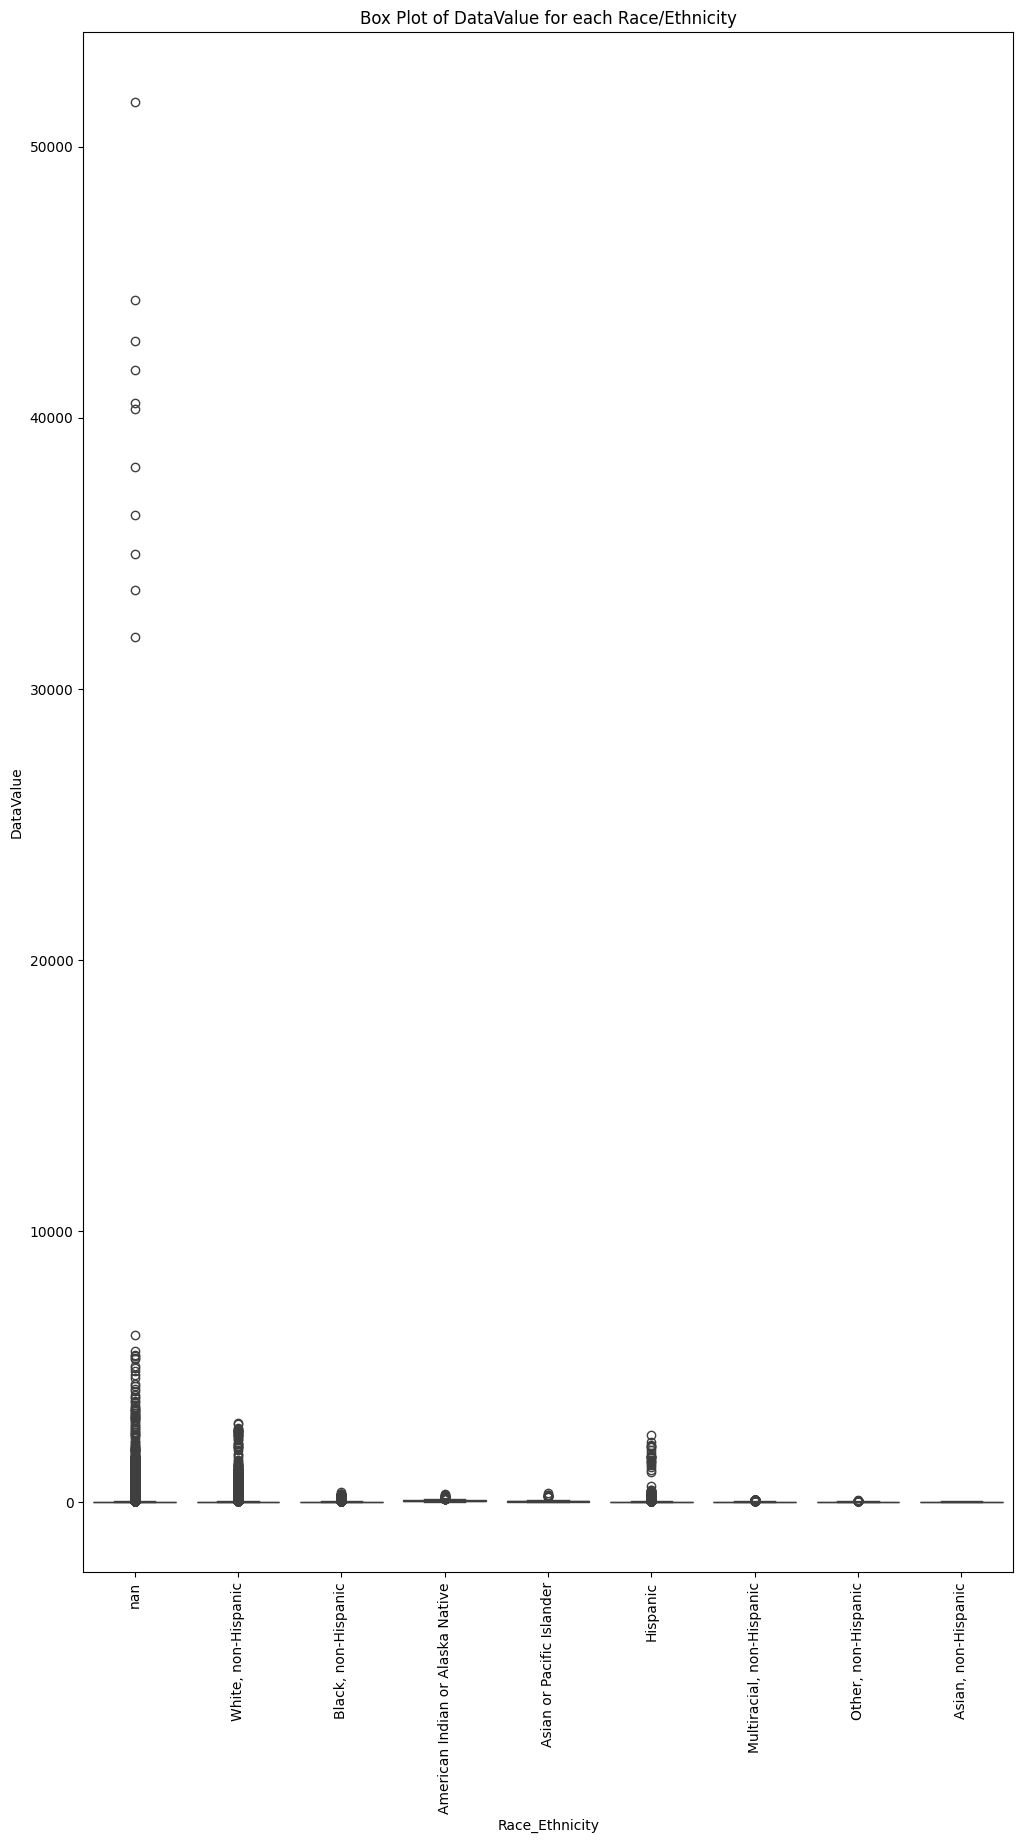

In [81]:
plt.figure(figsize=(12,20))
sns.boxplot(x='RaceEthnicity', y='DataValue', data=national_merged_MA)
plt.title('Box Plot of DataValue for each Race/Ethnicity')
plt.xlabel('Race_Ethnicity')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

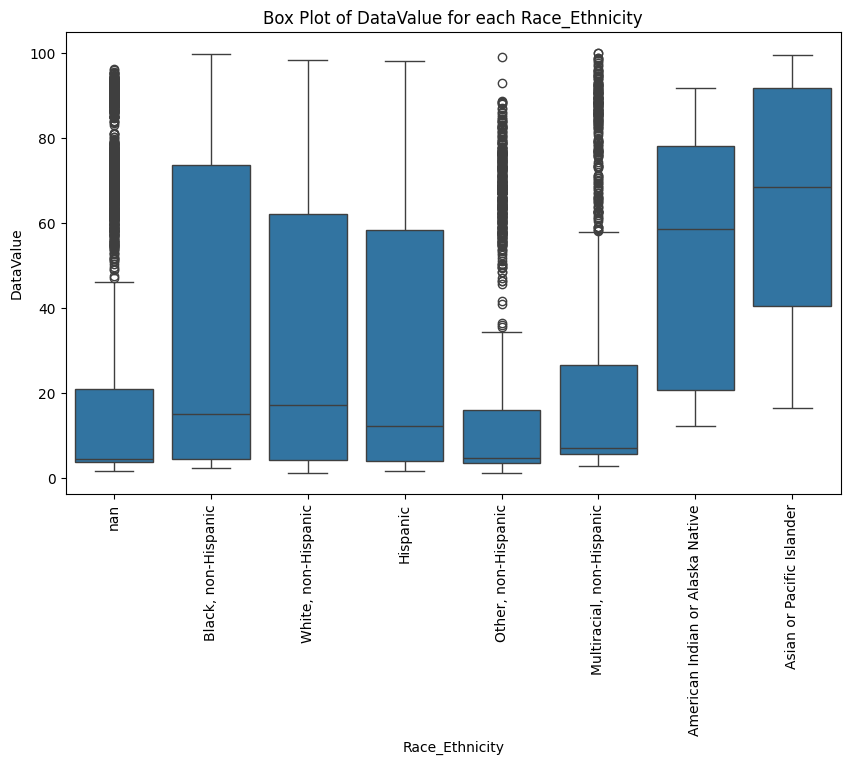

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RaceEthnicity', y='DataValue', data=national_merged_MR)
plt.title('Box Plot of DataValue for each Race_Ethnicity')
plt.xlabel('Race_Ethnicity')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

In [83]:
mh_al_mi= mh_al_mi.rename(columns={'Race/Ethnicity_mh': 'RaceEthnicity_mh'})
mh_al_mi= mh_al_mi.rename(columns={'Race/Ethnicity_al': 'RaceEthnicity_al'})

In [84]:
mh_al_mi = mh_al_mi.dropna(subset=['DataValue_mh'])

In [85]:
print(mh_al_mi.columns)

Index(['YearStart', 'YearEnd_mh', 'LocationDesc_mh', 'DataSource_mh',
       'Topic_mh', 'Question_mh', 'DataValueUnit_mh', 'DataValueType_mh',
       'DataValue_mh', 'DataValueAlt_mh', 'DataValueFootnoteSymbol_mh',
       'DatavalueFootnote_mh', 'LowConfidenceLimit_mh',
       'HighConfidenceLimit_mh', 'QuestionID_mh', 'DataValueTypeID_mh',
       'Gender_mh', 'RaceEthnicity_mh', 'Overall_mh', 'YearEnd_al',
       'LocationDesc_al', 'DataSource_al', 'Topic_al', 'Question_al',
       'DataValueUnit_al', 'DataValueType_al', 'DataValue_al',
       'DataValueAlt_al', 'DataValueFootnoteSymbol_al', 'DatavalueFootnote_al',
       'LowConfidenceLimit_al', 'HighConfidenceLimit_al', 'QuestionID_al',
       'DataValueTypeID_al', 'Gender_al', 'RaceEthnicity_al', 'Overall_al'],
      dtype='object')


In [86]:
mh_al_mi['RaceEthnicity_al'].unique()
mh_al_mi['RaceEthnicity_al'].value_counts()

RaceEthnicity_al
nan    11
Name: count, dtype: int64

In [87]:
mh_al_mi.isnull().sum()

YearStart                      0
YearEnd_mh                     0
LocationDesc_mh                0
DataSource_mh                  0
Topic_mh                       0
Question_mh                    0
DataValueUnit_mh               0
DataValueType_mh               0
DataValue_mh                   0
DataValueAlt_mh                0
DataValueFootnoteSymbol_mh    11
DatavalueFootnote_mh          11
LowConfidenceLimit_mh          0
HighConfidenceLimit_mh         0
QuestionID_mh                  0
DataValueTypeID_mh             0
Gender_mh                      0
RaceEthnicity_mh               0
Overall_mh                     0
YearEnd_al                     0
LocationDesc_al                0
DataSource_al                  0
Topic_al                       0
Question_al                    0
DataValueUnit_al               0
DataValueType_al               0
DataValue_al                   0
DataValueAlt_al                0
DataValueFootnoteSymbol_al    11
DatavalueFootnote_al          11
LowConfide

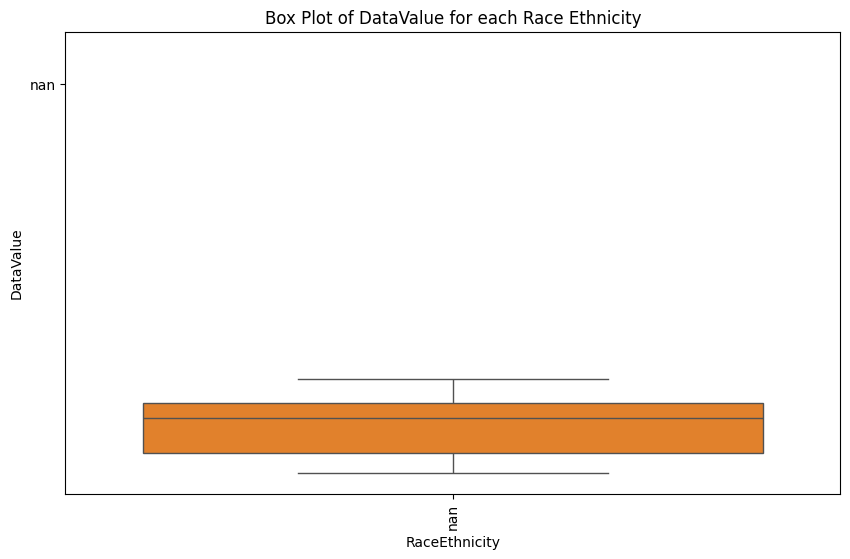

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(x='DataValue_mh',  y='RaceEthnicity_mh', data=mh_al_mi)
sns.boxplot(x='RaceEthnicity_mh',  y='DataValue_mh', data=mh_al_mi)
plt.title('Box Plot of DataValue for each Race Ethnicity')
plt.xlabel('RaceEthnicity')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

# Comparative Analysis
Compare and contrast different subsets of your data. This can include comparisons over time, across different categories, or any other relevant segmentation. Note that for some projects, the nature of this comparative analysis will be obvious. For others, you will need to think about how
you might subset your data.

Discuss any notable similarities or differences you have identified.

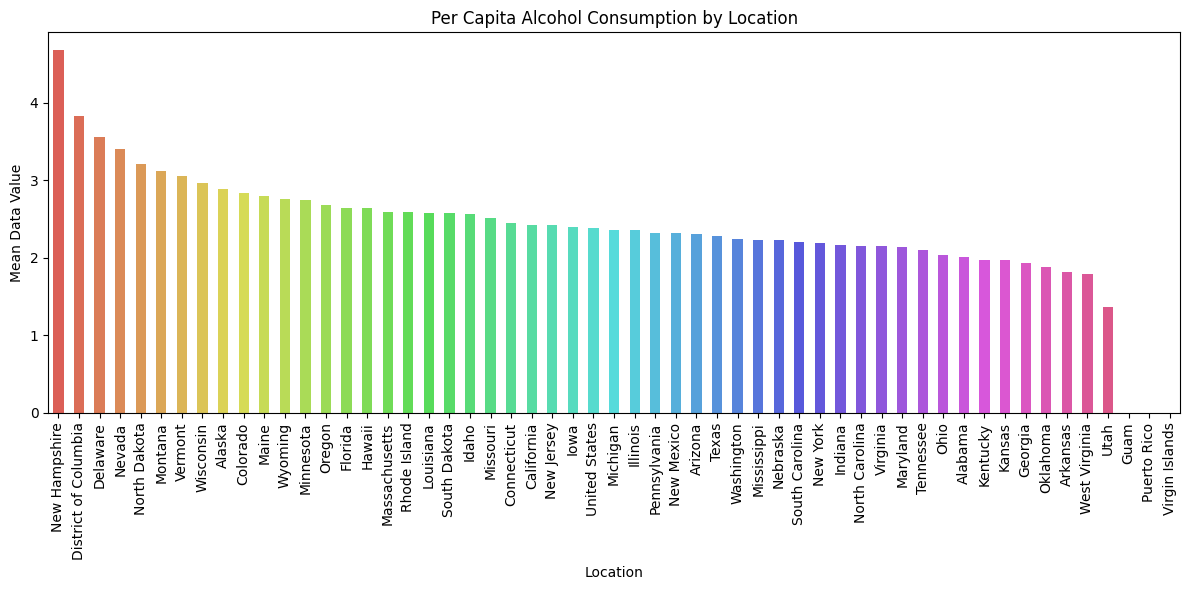

In [89]:
# Convert 'DataValue' to numeric, errors='coerce' will turn invalid values into NaN
national_alcohol_percapita_df['DataValue'] = pd.to_numeric(national_alcohol_percapita_df['DataValue'], errors='coerce')

# Group by 'LocationDesc' and calculate the mean data value for each location
national_alc_percapita_grouped_df = national_alcohol_percapita_df.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

palette = sns.color_palette("hls", len(national_alc_percapita_grouped_df))

national_alc_percapita_grouped_df.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Per Capita Alcohol Consumption by Location')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [90]:
national_merged_MA['DataValue'] = pd.to_numeric(national_merged_MA['DataValue'], errors='coerce')

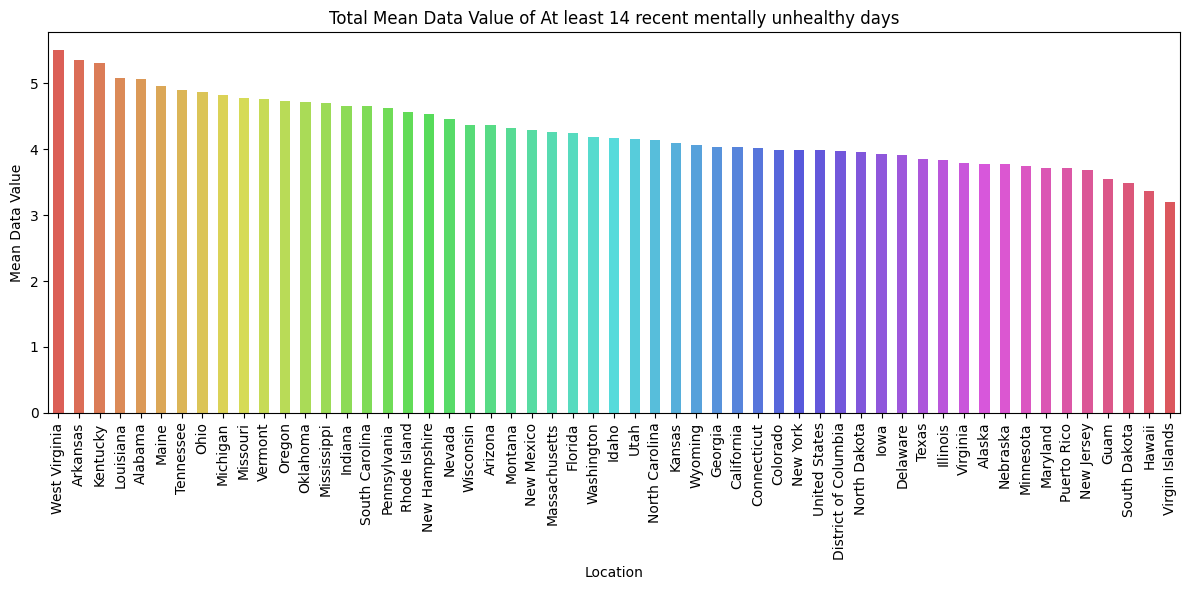

In [91]:
mental_natl_fourteen_days = national_merged_MA[national_merged_MA['Question'] ==  'Recent mentally unhealthy days among adults aged >= 18 years']

# Group by 'LocationDesc' and calculate the mean data value for each location
grouped_mental_natl_fourteen_days = mental_natl_fourteen_days.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

# Create a color palette
palette = sns.color_palette("hls", len(grouped_mental_natl_fourteen_days))

grouped_mental_natl_fourteen_days.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Total Mean Data Value of At least 14 recent mentally unhealthy days')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# national_merged_MA.DataValueType.unique()

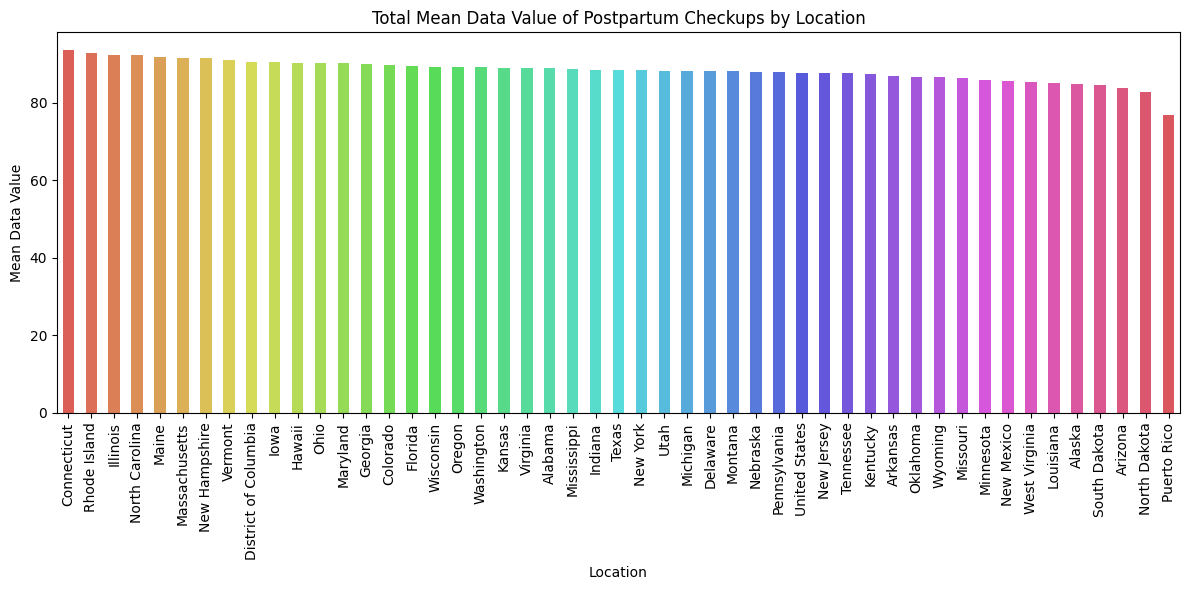

In [92]:
repro_natl_postpartum_checkup = national_merged_MR[national_merged_MR['Question'] == 'Postpartum checkup']

# Group by 'LocationDesc' and calculate the mean data value for each location
grouped_repro_postpartum_checkup = repro_natl_postpartum_checkup.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

# Create a color palette
palette = sns.color_palette("hls", len(grouped_repro_postpartum_checkup))

grouped_repro_postpartum_checkup.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Total Mean Data Value of Postpartum Checkups by Location')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


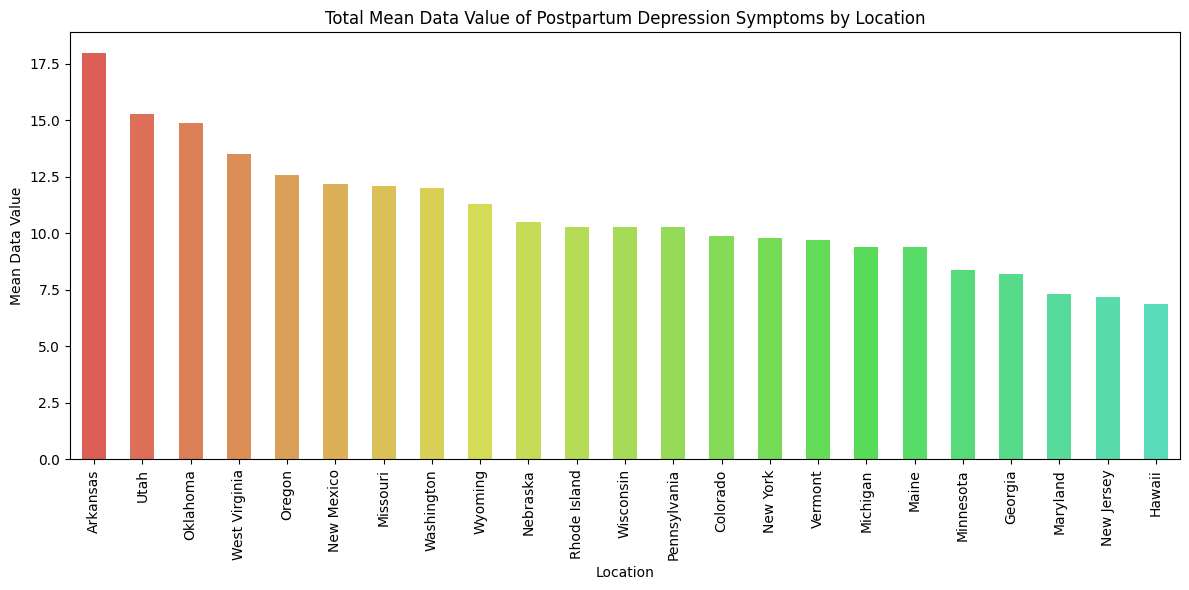

In [93]:
repro_natl_postpartum_depression = national_merged_MR[national_merged_MR['Question'] == 'Postpartum depressive symptoms']

# Group by 'LocationDesc' and calculate the mean data value for each location
grouped_repro_postpartum_depression = repro_natl_postpartum_depression.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

# Create a color palette
palette = sns.color_palette("hls", len(grouped_repro_postpartum_checkup))

grouped_repro_postpartum_depression.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Total Mean Data Value of Postpartum Depression Symptoms by Location')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Multivariate Analysis
Perform multivariate analysis to understand the relationships among three or more variables in your dataset.

Use techniques like cross-tabulation, pivot tables, and multivariate graphs.

LocationDesc                      Alabama  Alaska  Arizona  Arkansas  \
RaceEthnicity                                                          
American Indian or Alaska Native       45      48       40        46   
Asian or Pacific Islander              39      42       34        40   
Asian, non-Hispanic                     6       6        6         6   
Black, non-Hispanic                   188     191      183       189   
Hispanic                              188     191      183       189   
Multiracial, non-Hispanic             149     152      144       150   
Other, non-Hispanic                   149     152      144       150   
White, non-Hispanic                   188     191      183       189   
nan                                   523     523      523       523   

LocationDesc                      California  Colorado  Connecticut  Delaware  \
RaceEthnicity                                                                   
American Indian or Alaska Native          39 

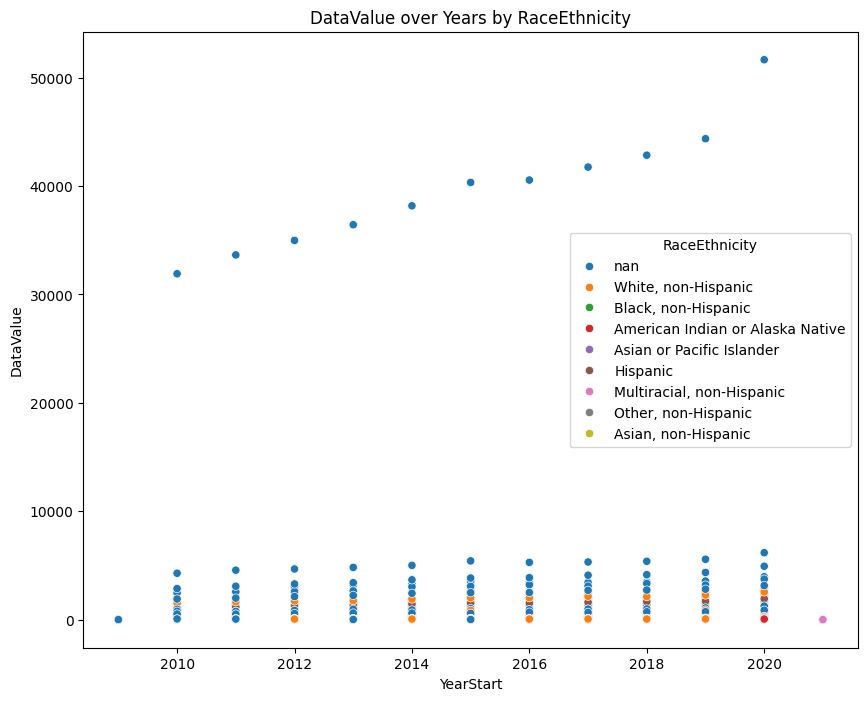

In [94]:
# Cross-tabulation
cross_tab = pd.crosstab(national_merged_MA['RaceEthnicity'], national_merged_MA['LocationDesc'])
print(cross_tab)

# Pivot table
pivot_table = national_merged_MA.pivot_table(values='DataValue', index='RaceEthnicity', columns='LocationDesc')
print(pivot_table)

# Multivariate graph
plt.figure(figsize=(10, 8))
sns.scatterplot(data=national_merged_MA, x='YearStart', y='DataValue', hue='RaceEthnicity')
plt.title('DataValue over Years by RaceEthnicity')
plt.show()

In [95]:
# Regression analysis
MA_model = smf.ols('DataValue ~ RaceEthnicity + LocationDesc', data=national_merged_MA).fit()
print(MA_model.summary())

# ANOVA
anova_results = sm.stats.anova_lm(MA_model, typ=2)
print(anova_results)

# Chi-squared test
contingency_table = pd.crosstab(national_merged_MA['RaceEthnicity'], national_merged_MA['LocationDesc'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}, p-value: {p}")

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.64
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.11e-133
Time:                        19:55:59   Log-Likelihood:            -1.6688e+05
No. Observations:               26764   AIC:                         3.339e+05
Df Residuals:                   26702   BIC:                         3.344e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

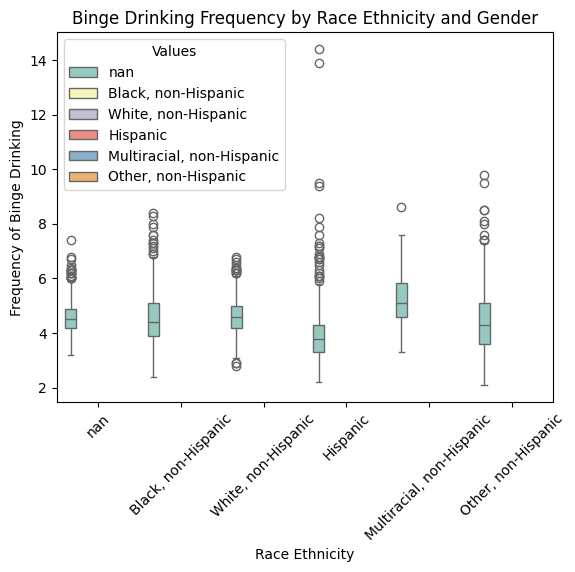

In [96]:
# Filter the dataset for 'Binge drinking frequency among adults aged >= 18 years who binge drink'
binge_drinking_df = national_merged_MA[national_merged_MA['Question'] == 'Binge drinking frequency among adults aged >= 18 years who binge drink']

# Define the order of hue categories
hue_order = binge_drinking_df['RaceEthnicity'].unique()

# Multivariate graph
sns.boxplot(x='RaceEthnicity', y='DataValue', hue='Gender', data=binge_drinking_df, palette='Set3', hue_order=hue_order)
plt.title('Binge Drinking Frequency by Race Ethnicity and Gender')
plt.xlabel('Race Ethnicity')
plt.ylabel('Frequency of Binge Drinking')
plt.xticks(rotation=45)
plt.legend(title='Values')
plt.show()

# Reflection

Include a section (using one or more markdown blocks) at the end of your notebook in which you reflect on the process of analyzing the data. Discuss any challenges you encountered and how you overcame them. Critically evaluate the limitations of your analysis and suggest areas for further research or improvement.

There is promising potential in our current dataset given the parameters that we have. In this process, we were able to find more comprehensive data points looking at different measures based on race, ethnicity, and gender according to location and different data value points for questions regarding mental health, alcohol, and reproductive health. In particular, we found information related to alcohol consumption (per capita) based on location and mean mental health "bad" days as a good indicator that could be the basis for further analysis.

However, as we continue to parse through the data more, we found some challenges in the way the data was collected and organized as one of the biggest barriers that we think allow for more room for improvement. For one, the Centers For Disease Control Data currently uses aggregated state level data broken down collectively by a series of demographic features, statistical data representations, and questions. Because of this, as well as the different measurements associated, it makes pulling data to run accurate inferential and multivariate analysis particularly difficult. Additionally, our technical skill set was limited to performing more advanced coding operations to clean up the data, and additional guidance from the teaching team would likely help significantly - an oversight we didn't anticipate at this stage in our project analysis. Additionally, we feel that some more guidance would be helpful in helping us understand what would be the best way to proceed forward, as we care about ensuring the accuracy of our analysis as we transition into the machine learning process phase.

## Part 3: Machine Learning Models

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


In [98]:
national_merged_MR.isnull().sum()

YearStart                        0
YearEnd                          0
LocationDesc                     0
DataSource                       0
Topic                            0
Question                         0
DataValueUnit_x               5510
DataValueType                    0
DataValue                        0
DataValueAlt                     0
DataValueFootnoteSymbol_x    16149
DatavalueFootnote_x          16149
LowConfidenceLimit               2
HighConfidenceLimit              2
QuestionID                       0
DataValueTypeID                  0
Gender                        5510
RaceEthnicity                    0
Overall_x                     5510
DataValueUnit_y              10716
DataValueFootnoteSymbol_y    15821
DatavalueFootnote_y          15821
Overall_y                    10716
dtype: int64

In [99]:
national_merged_MR.dtypes

YearStart                      int64
YearEnd                        int64
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
DataValueUnit_x               object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol_x     object
DatavalueFootnote_x           object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
QuestionID                    object
DataValueTypeID               object
Gender                        object
RaceEthnicity                 object
Overall_x                     object
DataValueUnit_y               object
DataValueFootnoteSymbol_y     object
DatavalueFootnote_y           object
Overall_y                     object
dtype: object

In [100]:
national_merged_MR['DataValueUnit_x'].unique()

array(['%', 'Number', nan], dtype=object)

In [101]:
national_merged_MR['DataValueUnit_x'].value_counts()

DataValueUnit_x
Number    8551
%         2165
Name: count, dtype: int64

In [102]:
random_rows = national_merged_MR.sample(n=20)

print(random_rows)


       YearStart  YearEnd          LocationDesc DataSource  \
9857        2015     2015               Wyoming      PRAMS   
8846        2015     2015              Nebraska      PRAMS   
16926       2019     2019               Indiana      BRFSS   
17244       2019     2019              Michigan      BRFSS   
18983       2020     2020               Georgia      BRFSS   
20758       2020     2020               Wyoming      PRAMS   
21428       2021     2021              Michigan      BRFSS   
10972       2016     2016                Nevada      BRFSS   
15962       2018     2018         United States      PRAMS   
2394        2012     2012              Maryland      BRFSS   
9957        2016     2016               Arizona      BRFSS   
3895        2013     2013              Colorado      PRAMS   
19853       2020     2020            New Jersey      BRFSS   
8026        2015     2015           Connecticut      BRFSS   
18892       2020     2020  District of Columbia      BRFSS   
9666    

In [103]:
random_rows.to_csv('random_rows.csv', index=False)

In [104]:
random_rows = national_merged_MR.groupby('DataValueUnit_x').apply(lambda x: x.sample(n=1))

print(random_rows)

                       YearStart  YearEnd LocationDesc DataSource  \
DataValueUnit_x                                                     
%               21410       2021     2021     Michigan      BRFSS   
Number          20734       2020     2020      Wyoming      BRFSS   

                               Topic  \
DataValueUnit_x                        
%               21410  Mental Health   
Number          20734  Mental Health   

                                                                Question  \
DataValueUnit_x                                                            
%               21410  At least 14 recent mentally unhealthy days amo...   
Number          20734  Recent mentally unhealthy days among adults ag...   

                      DataValueUnit_x      DataValueType  DataValue  \
DataValueUnit_x                                                       
%               21410               %   Crude Prevalence       16.8   
Number          20734          Number  Age-a

C:\Users\alize\AppData\Local\Temp\ipykernel_4964\2668119262.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_rows = national_merged_MR.groupby('DataValueUnit_x').apply(lambda x: x.sample(n=1))


In [105]:
national_merged_MR1 = national_merged_MR.drop(columns=['DataValueFootnoteSymbol_x', 'DatavalueFootnote_x', 'DataValueUnit_y','DataValueFootnoteSymbol_y','DatavalueFootnote_y','Gender', 'Overall_x', 'Overall_y'])

In [106]:
random_rows2 = national_merged_MR1.groupby('DataValue').apply(lambda x: x.sample(n=1))

print(random_rows2)

                 YearStart  YearEnd  LocationDesc DataSource  \
DataValue                                                      
1.2       12312       2017     2017       Georgia      BRFSS   
1.3       6136        2014     2014          Guam      BRFSS   
1.4       10382       2016     2016      Illinois      BRFSS   
1.5       12320       2017     2017       Georgia      BRFSS   
1.6       14526       2018     2018          Guam      BRFSS   
...                    ...      ...           ...        ...   
99.2      18034       2019     2019  Rhode Island      PRAMS   
99.3      15039       2018     2018      Michigan      PRAMS   
99.5      16622       2019     2019      Delaware      PRAMS   
99.7      10091       2016     2016      Colorado      PRAMS   
100.0     17460       2019     2019       Montana      PRAMS   

                               Topic  \
DataValue                              
1.2       12312        Mental Health   
1.3       6136         Mental Health   
1.4    

C:\Users\alize\AppData\Local\Temp\ipykernel_4964\2066477942.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_rows2 = national_merged_MR1.groupby('DataValue').apply(lambda x: x.sample(n=1))


In [107]:
random_rows2.to_csv('random_rows2.csv', index=False)

In [108]:
national_merged_MR1['RaceEthnicity'] = national_merged_MR1['RaceEthnicity'].replace('nan', 'White, non-Hispanic')

In [109]:
random_rows3 = national_merged_MR1.groupby('DataValue').apply(lambda x: x.sample(n=1))

print(random_rows3)

                 YearStart  YearEnd  LocationDesc DataSource  \
DataValue                                                      
1.2       12312       2017     2017       Georgia      BRFSS   
1.3       10390       2016     2016      Illinois      BRFSS   
1.4       6144        2014     2014          Guam      BRFSS   
1.5       12320       2017     2017       Georgia      BRFSS   
1.6       14526       2018     2018          Guam      BRFSS   
...                    ...      ...           ...        ...   
99.2      18034       2019     2019  Rhode Island      PRAMS   
99.3      19148       2020     2020      Illinois      PRAMS   
99.5      16622       2019     2019      Delaware      PRAMS   
99.7      10091       2016     2016      Colorado      PRAMS   
100.0     17460       2019     2019       Montana      PRAMS   

                               Topic  \
DataValue                              
1.2       12312        Mental Health   
1.3       10390        Mental Health   
1.4    

C:\Users\alize\AppData\Local\Temp\ipykernel_4964\684171559.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_rows3 = national_merged_MR1.groupby('DataValue').apply(lambda x: x.sample(n=1))


In [110]:
random_rows3.to_csv('random_rows3.csv', index=False)

In [111]:
national_merged_MR1.isnull().sum()

YearStart                 0
YearEnd                   0
LocationDesc              0
DataSource                0
Topic                     0
Question                  0
DataValueUnit_x        5510
DataValueType             0
DataValue                 0
DataValueAlt              0
LowConfidenceLimit        2
HighConfidenceLimit       2
QuestionID                0
DataValueTypeID           0
RaceEthnicity             0
dtype: int64

In [112]:
print(national_merged_MR1.dtypes)

YearStart                int64
YearEnd                  int64
LocationDesc            object
DataSource              object
Topic                   object
Question                object
DataValueUnit_x         object
DataValueType           object
DataValue              float64
DataValueAlt           float64
LowConfidenceLimit     float64
HighConfidenceLimit    float64
QuestionID              object
DataValueTypeID         object
RaceEthnicity           object
dtype: object


In [113]:
national_merged_MR1['DataValueUnit_x'] = national_merged_MR1['DataValueUnit_x'].fillna(national_merged_MR1['DataValueUnit_x'].mode()[0])

In [114]:
national_merged_MR1.isnull().sum()

YearStart              0
YearEnd                0
LocationDesc           0
DataSource             0
Topic                  0
Question               0
DataValueUnit_x        0
DataValueType          0
DataValue              0
DataValueAlt           0
LowConfidenceLimit     2
HighConfidenceLimit    2
QuestionID             0
DataValueTypeID        0
RaceEthnicity          0
dtype: int64

In [115]:
national_merged_MR1['LowConfidenceLimit'] = national_merged_MR1['LowConfidenceLimit'].fillna(national_merged_MR1['LowConfidenceLimit'].median())
national_merged_MR1['HighConfidenceLimit'] = national_merged_MR1['HighConfidenceLimit'].fillna(national_merged_MR1['HighConfidenceLimit'].median())

In [116]:
national_merged_MR1.isnull().sum()

YearStart              0
YearEnd                0
LocationDesc           0
DataSource             0
Topic                  0
Question               0
DataValueUnit_x        0
DataValueType          0
DataValue              0
DataValueAlt           0
LowConfidenceLimit     0
HighConfidenceLimit    0
QuestionID             0
DataValueTypeID        0
RaceEthnicity          0
dtype: int64

In [117]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [118]:
%pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.6 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.6 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.6 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.6 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/10.6 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/10.6 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/10.6 MB 2.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/10.6 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/10.6 MB 2.9 MB/s eta 0:00:04
   ---

  You can safely remove it manually.


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [120]:
# Assuming national_merged_MR1 is your DataFrame
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can use other strategies too
national_merged_MR1_imputed = imputer.fit_transform(national_merged_MR1)

In [121]:
# Convert the imputed data back to a DataFrame
national_merged_MR1_imputed = pd.DataFrame(national_merged_MR1_imputed, columns=national_merged_MR1.columns)

# Encode categorical variables
categorical_cols = ['LocationDesc', 'DataSource', 'Topic', 'Question', 'DataValueUnit_x', 'DataValueType', 'QuestionID', 'DataValueTypeID', 'RaceEthnicity']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(national_merged_MR1_imputed[categorical_cols]).toarray()

# Get feature names from the encoder and flatten the list
feature_names = [f"{col}__{category}" for col, categories in zip(categorical_cols, encoder.categories_) for category in categories]

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

ValueError: Shape of passed values is (16226, 1), indices imply (16226, 95)

In [ ]:
# Concatenate encoded categorical features with numerical features
numerical_cols = [col for col in national_merged_MR1_imputed.columns if col not in categorical_cols]
processed_data = pd.concat([national_merged_MR1_imputed[numerical_cols], encoded_df], axis=1)


In [123]:
print(processed_data.columns)

Index(['YearStart', 'YearEnd', 'DataValue', 'DataValueAlt',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'LocationDesc__Alabama',
       'LocationDesc__Alaska', 'LocationDesc__Arizona',
       'LocationDesc__Arkansas', 'LocationDesc__California',
       'LocationDesc__Colorado', 'LocationDesc__Connecticut',
       'LocationDesc__Delaware', 'LocationDesc__District of Columbia',
       'LocationDesc__Florida', 'LocationDesc__Georgia', 'LocationDesc__Guam',
       'LocationDesc__Hawaii', 'LocationDesc__Idaho', 'LocationDesc__Illinois',
       'LocationDesc__Indiana', 'LocationDesc__Iowa', 'LocationDesc__Kansas',
       'LocationDesc__Kentucky', 'LocationDesc__Louisiana',
       'LocationDesc__Maine', 'LocationDesc__Maryland',
       'LocationDesc__Massachusetts', 'LocationDesc__Michigan',
       'LocationDesc__Minnesota', 'LocationDesc__Mississippi',
       'LocationDesc__Missouri', 'LocationDesc__Montana',
       'LocationDesc__Nebraska', 'LocationDesc__Nevada',
       'LocationDe

In [125]:
X = processed_data.drop(columns=['DataValue'])  # Specify your target column name here
y = processed_data['RaceEthnicity__White, non-Hispanic']  # Specify your target column name here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

In [128]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
[[1579    0]
 [   0 1667]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1579
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3246
   macro avg       1.00      1.00      1.00      3246
weighted avg       1.00      1.00      1.00      3246



In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',multi_class="auto")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9996919285274184
[[1579    0]
 [   1 1666]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1579
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3246
   macro avg       1.00      1.00      1.00      3246
weighted avg       1.00      1.00      1.00      3246



In [130]:
from sklearn import svm
model = svm.SVC(gamma="scale",kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5375847196549599
[[ 407 1172]
 [ 329 1338]]
              precision    recall  f1-score   support

         0.0       0.55      0.26      0.35      1579
         1.0       0.53      0.80      0.64      1667

    accuracy                           0.54      3246
   macro avg       0.54      0.53      0.50      3246
weighted avg       0.54      0.54      0.50      3246



# MLM Model on National Merged Mental Health and Alcohol Use

In [ ]:
national_merged_MA.isnull().sum

<bound method DataFrame.sum of        YearStart  YearEnd  LocationDesc  DataSource  Topic  Question  \
0          False    False         False       False  False     False   
1          False    False         False       False  False     False   
2          False    False         False       False  False     False   
3          False    False         False       False  False     False   
4          False    False         False       False  False     False   
...          ...      ...           ...         ...    ...       ...   
79286      False    False         False       False  False     False   
79287      False    False         False       False  False     False   
79288      False    False         False       False  False     False   
79289      False    False         False       False  False     False   
79290      False    False         False       False  False     False   

       DataValueUnit_x  DataValueType  DataValue  DataValueAlt  ...  \
0                False          F

In [ ]:
national_merged_MA.dtypes

YearStart                      int64
YearEnd                        int64
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
DataValueUnit_x               object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol_x     object
DatavalueFootnote_x           object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
QuestionID                    object
DataValueTypeID               object
Gender                        object
RaceEthnicity                 object
Overall_x                     object
DataValueUnit_y               object
DataValueFootnoteSymbol_y     object
DatavalueFootnote_y           object
Overall_y                     object
dtype: object

In [132]:
national_merged_MR['DataValueUnit_x'].value_counts()

DataValueUnit_x
Number    8551
%         2165
Name: count, dtype: int64

In [133]:
random_MA1 = national_merged_MA.sample(n=20)

print(random_MA1)

       YearStart  YearEnd          LocationDesc DataSource          Topic  \
35176       2015     2015        South Carolina      BRFSS  Mental Health   
49555       2017     2017           Puerto Rico      BRFSS        Alcohol   
37873       2016     2016  District of Columbia      BRFSS        Alcohol   
22993       2014     2014              Colorado      BRFSS        Alcohol   
6884        2011     2011                 Texas      BRFSS        Alcohol   
30690       2015     2015               Georgia      BRFSS        Alcohol   
77018       2021     2021            New Mexico      BRFSS        Alcohol   
79259       2021     2021               Wyoming      BRFSS        Alcohol   
52007       2018     2018              Arkansas      BRFSS        Alcohol   
23703       2014     2014               Georgia      BRFSS        Alcohol   
75760       2021     2021             Louisiana      BRFSS        Alcohol   
63648       2019     2019        North Carolina      BRFSS        Alcohol   

In [134]:
random_MA1.to_csv('random_MA1.csv', index=False)

In [135]:
national_merged_MA1 = national_merged_MA.drop(columns=['DataValueFootnoteSymbol_x', 'DatavalueFootnote_x', 'DataValueUnit_y','DataValueFootnoteSymbol_y','DatavalueFootnote_y','Gender', 'Overall_x', 'Overall_y'])

In [136]:
random_MA2 = national_merged_MA1.groupby('DataValue').apply(lambda x: x.sample(n=1))

print(random_MA2)

                 YearStart  YearEnd   LocationDesc DataSource    Topic  \
DataValue                                                                
0.00      23303       2014     2014       Delaware      BRFSS  Alcohol   
0.02      66421       2019     2019        Wyoming       APIS  Alcohol   
0.06      70029       2020     2020       Missouri       APIS  Alcohol   
0.08      75586       2021     2021       Kentucky       APIS  Alcohol   
0.09      69354       2020     2020       Maryland       APIS  Alcohol   
...                    ...      ...            ...        ...      ...   
40545.00  42675       2016     2016  United States       NVSS  Alcohol   
41743.00  50416       2017     2017  United States       NVSS  Alcohol   
42838.00  57539       2018     2018  United States       NVSS  Alcohol   
44358.00  65383       2019     2019  United States       NVSS  Alcohol   
51642.00  72692       2020     2020  United States       NVSS  Alcohol   

                                     

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_22139/3682288643.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_MA2 = national_merged_MA1.groupby('DataValue').apply(lambda x: x.sample(n=1))


In [137]:
random_MA2.to_csv('random_MA2.csv', index=False)

In [138]:
print(national_merged_MA1['LowConfidenceLimit'].value_counts())

LowConfidenceLimit
4.1      805
3.8      801
4.0      780
3.6      756
3.7      754
        ... 
70.8       1
57.3       1
62.0       1
73.5       1
183.8      1
Name: count, Length: 752, dtype: int64


impute missing values for low and high confidence limit using the median to address missing values 

In [139]:
national_merged_MA1['LowConfidenceLimit'].median()

6.4

In [140]:
national_merged_MA1['LowConfidenceLimit'].fillna(national_merged_MA1['LowConfidenceLimit'].median(), inplace=True)

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_22139/3151207673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  national_merged_MA1['LowConfidenceLimit'].fillna(national_merged_MA1['LowConfidenceLimit'].median(), inplace=True)


In [141]:
random_MA3 = national_merged_MA1.groupby('DataValue').apply(lambda x: x.sample(n=1))

print(random_MA3)

                 YearStart  YearEnd   LocationDesc DataSource    Topic  \
DataValue                                                                
0.00      40940       2016     2016     New Mexico      BRFSS  Alcohol   
0.02      66421       2019     2019        Wyoming       APIS  Alcohol   
0.06      62407       2019     2019       Missouri       APIS  Alcohol   
0.08      46296       2017     2017       Kentucky       APIS  Alcohol   
0.09      10698       2012     2012       Maryland       APIS  Alcohol   
...                    ...      ...            ...        ...      ...   
40545.00  42675       2016     2016  United States       NVSS  Alcohol   
41743.00  50416       2017     2017  United States       NVSS  Alcohol   
42838.00  57539       2018     2018  United States       NVSS  Alcohol   
44358.00  65383       2019     2019  United States       NVSS  Alcohol   
51642.00  72692       2020     2020  United States       NVSS  Alcohol   

                                     

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_22139/1298089178.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_MA3 = national_merged_MA1.groupby('DataValue').apply(lambda x: x.sample(n=1))


In [142]:
random_MA3.to_csv('random_MA3.csv', index=False)

In [143]:
national_merged_MA1['HighConfidenceLimit'].median()

8.7

In [144]:
national_merged_MA1['HighConfidenceLimit'].fillna(national_merged_MA1['HighConfidenceLimit'].median(), inplace=True)

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_22139/854984008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  national_merged_MA1['HighConfidenceLimit'].fillna(national_merged_MA1['HighConfidenceLimit'].median(), inplace=True)


In [145]:
national_merged_MA1['RaceEthnicity'].value_counts()

RaceEthnicity
nan                                 28383
White, non-Hispanic                 10054
Black, non-Hispanic                 10054
Hispanic                            10054
Multiracial, non-Hispanic            8041
Other, non-Hispanic                  8041
American Indian or Alaska Native     2332
Asian or Pacific Islander            2002
Asian, non-Hispanic                   330
Name: count, dtype: int64

In [146]:
#drop rows that have nan in RaceEthnicity
national_merged_MA1 = national_merged_MA1[national_merged_MA1['RaceEthnicity'] != 'nan']

In [147]:
national_merged_MA1['RaceEthnicity'].value_counts()

RaceEthnicity
White, non-Hispanic                 10054
Black, non-Hispanic                 10054
Hispanic                            10054
Multiracial, non-Hispanic            8041
Other, non-Hispanic                  8041
American Indian or Alaska Native     2332
Asian or Pacific Islander            2002
Asian, non-Hispanic                   330
Name: count, dtype: int64

In [148]:
national_merged_MA1.isnull().sum()

YearStart                  0
YearEnd                    0
LocationDesc               0
DataSource                 0
Topic                      0
Question                   0
DataValueUnit_x        41998
DataValueType              0
DataValue              24144
DataValueAlt           24144
LowConfidenceLimit         0
HighConfidenceLimit        0
QuestionID                 0
DataValueTypeID            0
RaceEthnicity              0
dtype: int64

In [149]:
national_merged_MA1['DataValueUnit_x'] = national_merged_MR1['DataValueUnit_x'].fillna(national_merged_MA1['DataValueUnit_x'].mode()[0])

In [150]:
national_merged_MR1.isnull().sum()

YearStart              0
YearEnd                0
LocationDesc           0
DataSource             0
Topic                  0
Question               0
DataValueUnit_x        0
DataValueType          0
DataValue              0
DataValueAlt           0
LowConfidenceLimit     0
HighConfidenceLimit    0
QuestionID             0
DataValueTypeID        0
RaceEthnicity          0
dtype: int64

In [165]:
national_merged_MR1.shape

(16226, 15)

DataFrame Imputing

In [171]:
imputer = SimpleImputer(strategy='most_frequent')  # You can use other strategies too
national_merged_MA1_imputed = imputer.fit_transform(national_merged_MA1)

In [179]:
national_merged_MA1_imputed = pd.DataFrame(national_merged_MA1_imputed, columns=national_merged_MA1.columns)

# # Encode categorical variables
categorical_cols1 = ['LocationDesc', 'DataSource', 'Topic', 'Question', 'DataValueUnit_x', 'DataValueType', 'QuestionID', 'DataValueTypeID', 'RaceEthnicity']
encoder1 = OneHotEncoder(handle_unknown='ignore')
encoded_data1 = encoder.fit_transform(national_merged_MA1_imputed[categorical_cols1]).toarray()
feature_names1 = [f"{col}__{category}" for col, categories in zip(categorical_cols, encoder.categories_) for category in categories]


In [181]:
# # Convert numpy array to DataFrame
encoded_data_df = pd.DataFrame(encoded_data1, columns=feature_names1)

# # Concatenate
processed_data1 = pd.concat([national_merged_MA1_imputed[numerical_cols], encoded_data_df], axis=1)

In [182]:
national_merged_MA1.columns

Index(['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic',
       'Question', 'DataValueUnit_x', 'DataValueType', 'DataValue',
       'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'QuestionID', 'DataValueTypeID', 'RaceEthnicity'],
      dtype='object')

In [183]:
print(processed_data1.columns)

Index(['YearStart', 'YearEnd', 'DataValue', 'DataValueAlt',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'LocationDesc__Alabama',
       'LocationDesc__Alaska', 'LocationDesc__Arizona',
       'LocationDesc__Arkansas',
       ...
       'DataValueTypeID__MEAN', 'DataValueTypeID__NMBR',
       'RaceEthnicity__American Indian or Alaska Native',
       'RaceEthnicity__Asian or Pacific Islander',
       'RaceEthnicity__Asian, non-Hispanic',
       'RaceEthnicity__Black, non-Hispanic', 'RaceEthnicity__Hispanic',
       'RaceEthnicity__Multiracial, non-Hispanic',
       'RaceEthnicity__Other, non-Hispanic',
       'RaceEthnicity__White, non-Hispanic'],
      dtype='object', length=115)


In [184]:
X = processed_data.drop(columns=['DataValue'])  # Specify your target column name here
y = processed_data['RaceEthnicity__White, non-Hispanic']  # Specify your target column name here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [185]:
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

In [186]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
[[1579    0]
 [   0 1667]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1579
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3246
   macro avg       1.00      1.00      1.00      3246
weighted avg       1.00      1.00      1.00      3246



In [187]:
model = LogisticRegression(solver='liblinear',multi_class="auto")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9996919285274184
[[1579    0]
 [   1 1666]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1579
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3246
   macro avg       1.00      1.00      1.00      3246
weighted avg       1.00      1.00      1.00      3246



In [188]:
model = svm.SVC(gamma="scale",kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5375847196549599
[[ 407 1172]
 [ 329 1338]]
              precision    recall  f1-score   support

         0.0       0.55      0.26      0.35      1579
         1.0       0.53      0.80      0.64      1667

    accuracy                           0.54      3246
   macro avg       0.54      0.53      0.50      3246
weighted avg       0.54      0.54      0.50      3246



# Machine Learning Model for michigan merged alcohol and mental health set (mh_al_mi)

In [ ]:
mh_al_mi.columns

Index(['YearStart', 'YearEnd_mh', 'LocationDesc_mh', 'DataSource_mh',
       'Topic_mh', 'Question_mh', 'DataValueUnit_mh', 'DataValueType_mh',
       'DataValue_mh', 'DataValueAlt_mh', 'DataValueFootnoteSymbol_mh',
       'DatavalueFootnote_mh', 'LowConfidenceLimit_mh',
       'HighConfidenceLimit_mh', 'QuestionID_mh', 'DataValueTypeID_mh',
       'Gender_mh', 'RaceEthnicity_mh', 'Overall_mh', 'YearEnd_al',
       'LocationDesc_al', 'DataSource_al', 'Topic_al', 'Question_al',
       'DataValueUnit_al', 'DataValueType_al', 'DataValue_al',
       'DataValueAlt_al', 'DataValueFootnoteSymbol_al', 'DatavalueFootnote_al',
       'LowConfidenceLimit_al', 'HighConfidenceLimit_al', 'QuestionID_al',
       'DataValueTypeID_al', 'Gender_al', 'RaceEthnicity_al', 'Overall_al'],
      dtype='object')

In [ ]:
mh_al_mi.isnull().sum()

YearStart                      0
YearEnd_mh                     0
LocationDesc_mh                0
DataSource_mh                  0
Topic_mh                       0
Question_mh                    0
DataValueUnit_mh               0
DataValueType_mh               0
DataValue_mh                   0
DataValueAlt_mh                0
DataValueFootnoteSymbol_mh    11
DatavalueFootnote_mh          11
LowConfidenceLimit_mh          0
HighConfidenceLimit_mh         0
QuestionID_mh                  0
DataValueTypeID_mh             0
Gender_mh                      0
RaceEthnicity_mh               0
Overall_mh                     0
YearEnd_al                     0
LocationDesc_al                0
DataSource_al                  0
Topic_al                       0
Question_al                    0
DataValueUnit_al               0
DataValueType_al               0
DataValue_al                   0
DataValueAlt_al                0
DataValueFootnoteSymbol_al    11
DatavalueFootnote_al          11
LowConfide

In [ ]:
# drop columns DataValueFootnoteSymbol_mh, DatavalueFootnote_mh
mh_al_mi = mh_al_mi.drop(columns=['DataValueFootnoteSymbol_mh', 'DatavalueFootnote_mh', 'DataValueFootnoteSymbol_al','DatavalueFootnote_al' ])

In [ ]:
random_MI_Al = mh_al_mi.groupby('DataValue_mh').apply(lambda x: x.sample(n=1))

print(random_MI_Al)

                YearStart  YearEnd_mh LocationDesc_mh DataSource_mh  \
DataValue_mh                                                          
3.8          9       2015        2015        Michigan         BRFSS   
3.9          2       2013        2013        Michigan         BRFSS   
4.1          4       2014        2014        Michigan         BRFSS   
4.2          1       2011        2011        Michigan         BRFSS   
4.3          8       2017        2017        Michigan         BRFSS   
4.5          5       2018        2018        Michigan         BRFSS   
5.0          0       2021        2021        Michigan         BRFSS   

                     Topic_mh  \
DataValue_mh                    
3.8          9  Mental Health   
3.9          2  Mental Health   
4.1          4  Mental Health   
4.2          1  Mental Health   
4.3          8  Mental Health   
4.5          5  Mental Health   
5.0          0  Mental Health   

                                                      Question

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_81009/1958669309.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_MI_Al = mh_al_mi.groupby('DataValue_mh').apply(lambda x: x.sample(n=1))


In [ ]:
random_MI_Al.to_csv('random_MI_Al.csv', index=False)

In [ ]:
mh_al_mi_imputed = imputer.fit_transform(mh_al_mi)

In [ ]:
new_column_names = ['column_' + str(i) for i in range(mh_al_mi_imputed.shape[1])]

# Convert the imputed data back to a DataFrame using the new column names
mh_al_mi_imputed_df = pd.DataFrame(mh_al_mi_imputed, columns=new_column_names)

# Encode categorical variables
categorical_cols = ['LocationDesc_mh',
                    'LocationDesc_al',
                    'DataSource_mh',
                    'DataSource_al',
                    'Topic_mh', 
                    'Topic_al', 
                    'Question_mh',
                    'Question_al', 
                    'DataValueUnit_mh',
                    'DataValueUnit_al',
                    'DataValueType_mh', 
                    'DataValueType_al', 
                    'QuestionID_mh',
                    'QuestionID_al', 
                    'DataValueTypeID_al',
                    'DataValueTypeID_mh', 
                    'RaceEthnicity_al',
                    'RaceEthnicity_mh']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data2 = encoder.fit_transform(mh_al_mi_imputed[categorical_cols]).toarray()
feature_names2 = encoder.get_feature_names_out(categorical_cols)
for col in categorical_cols:
    unique_values = mh_al_mi_imputed[col].unique()
    unique_values = [str(value) for value in unique_values]
    encoded_names = [col + '_' + value for value in unique_values]
    feature_names.extend(encoded_names)
#encoded_df = pd.DataFrame(encoded_data, columns=feature_names)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
mh_al_mi_imputed_df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
mh_al_mi_imputed.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
# # Convert numpy array to DataFrame
mh_al_mi_impute_df= pd.DataFrame(encoded_data)
# # Concatenate
processed_data1 = pd.concat([mh_al_mi_imputed_df[numerical_cols], encoded_data_df], axis=1)

KeyError: "None of [Index(['YearStart', 'YearEnd', 'DataValue', 'DataValueAlt',\n       'LowConfidenceLimit', 'HighConfidenceLimit'],\n      dtype='object')] are in the [columns]"